In [1]:
!pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /opt/anaconda3/lib/python3.8/site-packages (0.1.55)


In [4]:
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import pandas_datareader.data as web
import yfinance as yf
import matplotlib.pyplot as plt
from scipy import stats 

import statsmodels.stats.api as smsa
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

In [ ]:
from pandas_datareader import data as web
import datetime
start=datetime.datetime(2020,3,14) #The time when Trump declared a national public health emergency
end=datetime.datetime(2020,6,22) #100 days
AMZN= web.DataReader('AMZN','yahoo', start, end)
SHOP=web.DataReader('SHOP','yahoo', start, end)
CHWY=web.DataReader('CHWY','yahoo', start, end)
PDD=web.DataReader('PDD','yahoo', start, end)
JD=web.DataReader('JD','yahoo', start, end)
AMZN

In [ ]:
#Create log_return for this 5 stocks
AMZN['log_return']=np.log(AMZN['Close']/AMZN['Open'])
SHOP['log_return']=np.log(SHOP['Close']/SHOP['Open'])
CHWY['log_return']=np.log(CHWY['Close']/CHWY['Open'])
PDD['log_return']=np.log(PDD['Close']/PDD['Open'])
JD['log_return']=np.log(JD['Close']/JD['Open'])


In [ ]:
#Display histograms for yourdata (i.e., log-returns) for this 5 stocks
plt.subplots(3,2,figsize=(24,24))
plt.subplot(3,2,1)
amzn_hist=plt.hist(AMZN['log_return'],bins=30)
plt.title('AMZN')
plt.subplot(3,2,2)
shop_hist=plt.hist(SHOP['log_return'],bins=30)
plt.title('SHOP')
plt.subplot(3,2,3)
chwy_hist=plt.hist(CHWY['log_return'],bins=30)
plt.title('CHWY')
plt.subplot(3,2,4)
pdd_hist=plt.hist(PDD['log_return'],bins=30)
plt.title('PDD')
plt.subplot(3,2,5)
jd_hist=plt.hist(JD['log_return'],bins=30)
plt.title('JD')

In [ ]:
#Display a normal probability plot for this 5 stocks
plt.subplots(3,2,figsize=(24,24))
plt.subplot(3,2,1)
amzn_nd=stats.probplot(AMZN['log_return'],dist='norm',plot=plt)
plt.title('AMZN')
plt.subplot(3,2,2)
shop_nd=stats.probplot(SHOP['log_return'],dist='norm',plot=plt)
plt.title('SHOP')
plt.subplot(3,2,3)
chwy_hist=stats.probplot(CHWY['log_return'],dist='norm',plot=plt)
plt.title('CHWY')
plt.subplot(3,2,4)
pdd_hist=stats.probplot(PDD['log_return'],dist='norm',plot=plt)
plt.title('PDD')
plt.subplot(3,2,5)
jd_hist=stats.probplot(JD['log_return'],dist='norm',plot=plt)
plt.title('JD')

In [ ]:
#Create (approximate) confidence intervals for the meansand  variances  given  a  confidence  level alpha=0.05.
#We first create a dataframe for stocks's returns
stock_list=[AMZN,SHOP,CHWY,PDD,JD]
stockname_list=['AMZN','SHOP','CHWY','PDD','JD']
stock_return_list=[]
for df in stock_list:
    stock_return_list.append(df.loc[:,'log_return'])
stock_return=pd.DataFrame(stock_return_list).T
stock_return.columns=stockname_list
stock_return

In [ ]:
#Construct confidence interval for 5 stocks
a1=stock_return['AMZN']
ci_a1=smsa.DescrStatsW(a1).tconfint_mean()
a2=stock_return['SHOP']
ci_a2=smsa.DescrStatsW(a2).tconfint_mean()
a3=stock_return['CHWY']
ci_a3=smsa.DescrStatsW(a3).tconfint_mean()
a4=stock_return['PDD']
ci_a4=smsa.DescrStatsW(a4).tconfint_mean()
a5=stock_return['JD']
ci_a5=smsa.DescrStatsW(a5).tconfint_mean()

print('''AMZN's Confidence intervals for the means given  alpha=0.05 is : ''' + str(ci_a1))
print('''SHOP's Confidence intervals for the means given  alpha=0.05 is : ''' + str(ci_a2))
print('''CHWY's Confidence intervals for the means given  alpha=0.05 is : ''' + str(ci_a3))
print('''PDD's Confidence intervals for the means given  alpha=0.05 is : ''' + str(ci_a4))
print('''JD's Confidence intervals for the means given  alpha=0.05 is : ''' + str(ci_a5))


In [ ]:
#Define a function to calculate the confidence interval for variance
def variance_ci(confidence_level,stock):
    n = len(stock_return[stock])
    level = n - 1
    s2 = np.var(stock_return[stock], ddof=1)
    upper = (n - 1) * s2 / stats.chi2.ppf(confidence_level / 2, level)
    lower = (n - 1) * s2 / stats.chi2.ppf(1 - confidence_level / 2, level)
    return (lower, upper)

In [ ]:
#Confidence interval for variance given alpha=0.05
b1=variance_ci(0.05,'AMZN')
b2=variance_ci(0.05,'SHOP')
b3=variance_ci(0.05,'CHWY')
b4=variance_ci(0.05,'PDD')
b5=variance_ci(0.05,'JD')

print('''AMZN's Confidence intervals for the variance given  alpha=0.05 is : ''' + str(b1))
print('''SHOP's Confidence intervals for the variance given  alpha=0.05 is : ''' + str(b2))
print('''CHWY's Confidence intervals for the variance given  alpha=0.05 is : ''' + str(b3))
print('''PDD's Confidence intervals for the variance given  alpha=0.05 is : ''' + str(b4))
print('''JD's Confidence intervals for the variance given  alpha=0.05 is : ''' + str(b5))

In [ ]:
#Another method
#stats.t.interval(0.95, len(a1)-1, loc=np.mean(a), scale=stats.sem(a))

In [ ]:
#Perform  a  regression  of  the  log-return  on  time
#AMZN
AMZN['Date']=AMZN.index
AMZN['Date_Variable']=(AMZN['Date']-AMZN['Date'][0])/np.timedelta64(1,'D')
x=AMZN['Date_Variable'].values.reshape(-1,1)
y=AMZN['log_return'].values
plt.subplots(2,1,figsize=(24,24))
plt.subplot(2,1,1)
reg = LinearRegression().fit(x, y)
graph1=sns.regplot(x,y)
xvar1=graph1.get_xticks()
xvar2=[]
for elements in xvar1:
    xvar2.append(AMZN['Date'][0]+elements*np.timedelta64(1,'D'))
graph1.set_xticklabels(xvar2,fontsize='x-large')
graph1.set_xlabel('date',fontsize='large')
graph1.set_ylabel('log_return',fontsize='large')
graph1.set_title('regression of the log-return of AMZN on time',fontsize='x-large')

plt.subplot(2,1,2)
graph2=sns.residplot(x,y)
xvar1_=graph2.get_xticks()
xvar2_=[]
for elements in xvar1:
    xvar2_.append(AMZN['Date'][0]+elements*np.timedelta64(1,'D'))
graph2.set_xticklabels(xvar2_,fontsize='x-large')
graph2.set_xlabel('date',fontsize='large')
graph2.set_ylabel('log_return',fontsize='large')
graph2.set_title('residual plot',fontsize='x-large')

rsq = reg.score(x, y)
print('R square value is :', rsq)
print('Beta0 value is:', reg.intercept_)
print('Beta1 value is:', reg.coef_)

In [ ]:
#SHOP
SHOP['Date']=SHOP.index
SHOP['Date_Variable']=(SHOP['Date']-SHOP['Date'][0])/np.timedelta64(1,'D')
x=SHOP['Date_Variable'].values.reshape(-1,1)
y=SHOP['log_return'].values
plt.subplots(2,1,figsize=(24,24))
plt.subplot(2,1,1)
reg = LinearRegression().fit(x, y)
graph1=sns.regplot(x,y)
xvar1=graph1.get_xticks()
xvar2=[]
for elements in xvar1:
    xvar2.append(SHOP['Date'][0]+elements*np.timedelta64(1,'D'))
graph1.set_xticklabels(xvar2,fontsize='x-large')
graph1.set_xlabel('date',fontsize='large')
graph1.set_ylabel('log_return',fontsize='large')
graph1.set_title('regression of the log-return of SHOP on time',fontsize='x-large')

plt.subplot(2,1,2)
graph2=sns.residplot(x,y)
xvar1_=graph2.get_xticks()
xvar2_=[]
for elements in xvar1:
    xvar2_.append(SHOP['Date'][0]+elements*np.timedelta64(1,'D'))
graph2.set_xticklabels(xvar2_,fontsize='x-large')
graph2.set_xlabel('date',fontsize='large')
graph2.set_ylabel('log_return',fontsize='large')
graph2.set_title('residual plot',fontsize='x-large')
rsq = reg.score(x, y)
print('R square value is :', rsq)
print('Beta0 value is:', reg.intercept_)
print('Beta1 value is:', reg.coef_)

In [ ]:
#CHWY
CHWY['Date']=CHWY.index
CHWY['Date_Variable']=(CHWY['Date']-CHWY['Date'][0])/np.timedelta64(1,'D')
x=CHWY['Date_Variable'].values.reshape(-1,1)
y=CHWY['log_return'].values
plt.subplots(2,1,figsize=(24,24))
plt.subplot(2,1,1)
reg = LinearRegression().fit(x, y)
graph1=sns.regplot(x,y)
xvar1=graph1.get_xticks()
xvar2=[]
for elements in xvar1:
    xvar2.append(CHWY['Date'][0]+elements*np.timedelta64(1,'D'))
graph1.set_xticklabels(xvar2,fontsize='x-large')
graph1.set_xlabel('date',fontsize='large')
graph1.set_ylabel('log_return',fontsize='large')
graph1.set_title('regression of the log-return of CHWY on time',fontsize='x-large')

plt.subplot(2,1,2)
graph2=sns.residplot(x,y)
xvar1_=graph2.get_xticks()
xvar2_=[]
for elements in xvar1:
    xvar2_.append(CHWY['Date'][0]+elements*np.timedelta64(1,'D'))
graph2.set_xticklabels(xvar2_,fontsize='x-large')
graph2.set_xlabel('date',fontsize='large')
graph2.set_ylabel('log_return',fontsize='large')
graph2.set_title('residual plot',fontsize='x-large')
rsq = reg.score(x, y)
print('R square value is :', rsq)
print('Beta0 value is:', reg.intercept_)
print('Beta1 value is:', reg.coef_)

In [ ]:
#PDD
PDD['Date']=PDD.index
PDD['Date_Variable']=(PDD['Date']-PDD['Date'][0])/np.timedelta64(1,'D')
x=PDD['Date_Variable'].values.reshape(-1,1)
y=PDD['log_return'].values
plt.subplots(2,1,figsize=(24,24))
plt.subplot(2,1,1)
reg = LinearRegression().fit(x, y)
graph1=sns.regplot(x,y)
xvar1=graph1.get_xticks()
xvar2=[]
for elements in xvar1:
    xvar2.append(PDD['Date'][0]+elements*np.timedelta64(1,'D'))
graph1.set_xticklabels(xvar2,fontsize='x-large')
graph1.set_xlabel('date',fontsize='large')
graph1.set_ylabel('log_return',fontsize='large')
graph1.set_title('regression of the log-return of PDD on time',fontsize='x-large')

plt.subplot(2,1,2)
graph2=sns.residplot(x,y)
xvar1_=graph2.get_xticks()
xvar2_=[]
for elements in xvar1:
    xvar2_.append(PDD['Date'][0]+elements*np.timedelta64(1,'D'))
graph2.set_xticklabels(xvar2_,fontsize='x-large')
graph2.set_xlabel('date',fontsize='large')
graph2.set_ylabel('log_return',fontsize='large')
graph2.set_title('residual plot',fontsize='x-large')
rsq = reg.score(x, y)
print('R square value is :', rsq)
print('Beta0 value is:', reg.intercept_)
print('Beta1 value is:', reg.coef_)

R square value is : 0.0008480104218510087
Beta0 value is: 0.00027242486314315033
Beta1 value is: [2.17631271e-05]


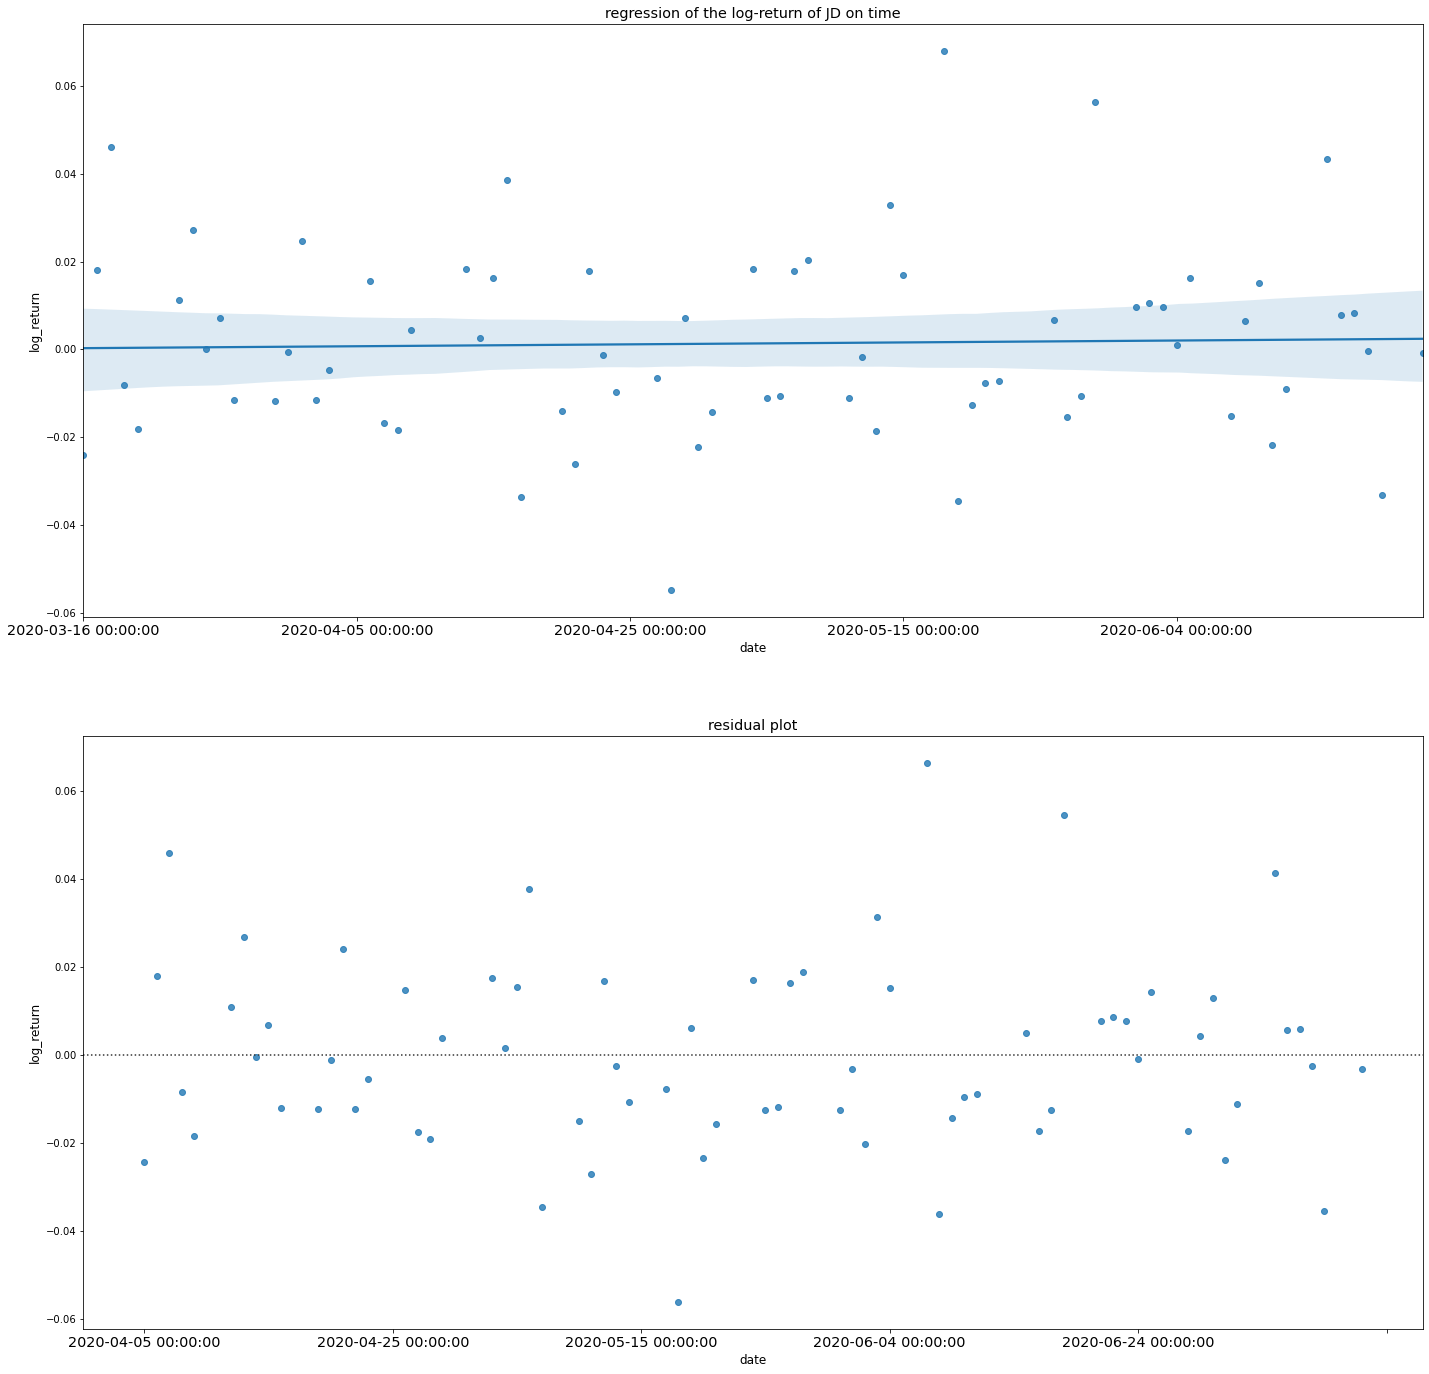

In [16]:
#JD
JD['Date']=JD.index
JD['Date_Variable']=(JD['Date']-JD['Date'][0])/np.timedelta64(1,'D')
x=JD['Date_Variable'].values.reshape(-1,1)
y=JD['log_return'].values
plt.subplots(2,1,figsize=(24,24))
plt.subplot(2,1,1)
reg = LinearRegression().fit(x, y)
graph1=sns.regplot(x,y)
xvar1=graph1.get_xticks()
xvar2=[]
for elements in xvar1:
    xvar2.append(JD['Date'][0]+elements*np.timedelta64(1,'D'))
graph1.set_xticklabels(xvar2,fontsize='x-large')
graph1.set_xlabel('date',fontsize='large')
graph1.set_ylabel('log_return',fontsize='large')
graph1.set_title('regression of the log-return of JD on time',fontsize='x-large')

plt.subplot(2,1,2)
graph2=sns.residplot(x,y)
xvar1_=graph2.get_xticks()
xvar2_=[]
for elements in xvar1:
    xvar2_.append(JD['Date'][0]+elements*np.timedelta64(1,'D'))
graph2.set_xticklabels(xvar2_,fontsize='x-large')
graph2.set_xlabel('date',fontsize='large')
graph2.set_ylabel('log_return',fontsize='large')
graph2.set_title('residual plot',fontsize='x-large')
rsq = reg.score(x, y)
print('R square value is :', rsq)
print('Beta0 value is:', reg.intercept_)
print('Beta1 value is:', reg.coef_)

In [17]:
#2.1
#first we build a panda dataframe named "stats" to store the statistic datas of these 5 stocks
stats_=pd.DataFrame()
stats_['mean'] = stock_return.apply(lambda x: x.mean())
stats_['sample_variance'] = stock_return.apply(lambda x: x.var())
stats_['z_value']=''
stats_['p_value']=''
stats_['mean']['AMZN']

0.004395755604318613

In [18]:
#Def a function to test the equality of means of two stocks. 
#stock2 is the stock which is used to compared.
#We choose to compute the p-value and compare with the alpha=0.05
n=len(AMZN['log_return'])

def mean_equality_test(stock1,stock2):
    stats_['z_value'][stock1] = (stats_['mean'][stock1] - stats_['mean'][stock2])/np.sqrt(stats_['sample_variance'][stock1]/n + stats_['sample_variance'][stock2]/n)

mean_equality_test('SHOP','AMZN')
mean_equality_test('PDD','AMZN')
mean_equality_test('CHWY','AMZN')
mean_equality_test('JD','AMZN')
stats_['p_value']['SHOP']=p_values = stats.norm.sf(np.abs(stats_['z_value']['SHOP']))*2
stats_['p_value']['CHWY']=p_values = stats.norm.sf(np.abs(stats_['z_value']['CHWY']))*2
stats_['p_value']['PDD']=p_values = stats.norm.sf(np.abs(stats_['z_value']['PDD']))*2
stats_['p_value']['JD']=p_values = stats.norm.sf(np.abs(stats_['z_value']['JD']))*2
stats_

<ipython-input-18-ace3e9cf7c1a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_['z_value'][stock1] = (stats_['mean'][stock1] - stats_['mean'][stock2])/np.sqrt(stats_['sample_variance'][stock1]/n + stats_['sample_variance'][stock2]/n)
<ipython-input-18-ace3e9cf7c1a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_['p_value']['SHOP']=p_values = stats.norm.sf(np.abs(stats_['z_value']['SHOP']))*2
<ipython-input-18-ace3e9cf7c1a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,mean,sample_variance,z_value,p_value
AMZN,0.004396,0.000363,,
SHOP,0.008486,0.001492,0.788805,0.430226
CHWY,0.008307,0.002195,0.642363,0.520637
PDD,0.008705,0.001428,0.845713,0.397713
JD,0.001322,0.000471,-0.883788,0.376811


In [19]:
#2.2

def log_return_regression(stock1,stock2):
    x=stock_return[stock1].values.reshape(-1,1)
    y=stock_return[stock2].values
    plt.subplots(2,1,figsize=(24,24))
    plt.subplot(2,1,1)
    reg = LinearRegression().fit(x, y)
    graph1=sns.regplot(x,y)
   
    graph1.set_xlabel('Log-return of %s' % stock1,fontsize='large')
    graph1.set_ylabel('Log_return of %s'% stock2,fontsize='large')
    graph1.set_title('regression of the log-return of '+stock1+' and '+stock2+' on time',fontsize='x-large')

    plt.subplot(2,1,2)
    graph2=sns.residplot(x,y)
    
    graph2.set_xlabel('Log-return of %s' % stock1,fontsize='large')
    graph2.set_ylabel('Log_return of %s'% stock2,fontsize='large')
    graph2.set_title('residual plot of '+stock1+' and '+stock2,fontsize='x-large')
    rsq = reg.score(x, y)
    print('R square value is :', rsq)
    print('Beta0 value is:', reg.intercept_)
    print('Beta1 value is:', reg.coef_)

R square value is : 0.21794319397022588
Beta0 value is: 0.004327392430590729
Beta1 value is: [0.94594203]
R square value is : 0.02534785235395276
Beta0 value is: 0.006586787285702531
Beta1 value is: [0.39132446]
R square value is : 0.017739593854118496
Beta0 value is: 0.0075441713427191305
Beta1 value is: [0.26407927]
R square value is : 0.15346518321178637
Beta0 value is: -0.0006392361576108515
Beta1 value is: [0.44618896]
R square value is : 0.21794319397022566
Beta0 value is: 0.002440707838226799
Beta1 value is: [0.23039804]
R square value is : 0.02114031749885259
Beta0 value is: 0.0068103466043891
Beta1 value is: [0.17637186]
R square value is : 0.0033868059291234376
Beta0 value is: 0.008221780998580832
Beta1 value is: [0.0569462]
R square value is : 0.0026602345074421274
Beta0 value is: 0.0010760876265388667
Beta1 value is: [0.02899219]
R square value is : 0.02534785235395287
Beta0 value is: 0.003857676688192417
Beta1 value is: [0.06477452]
R square value is : 0.0211403174988527
B

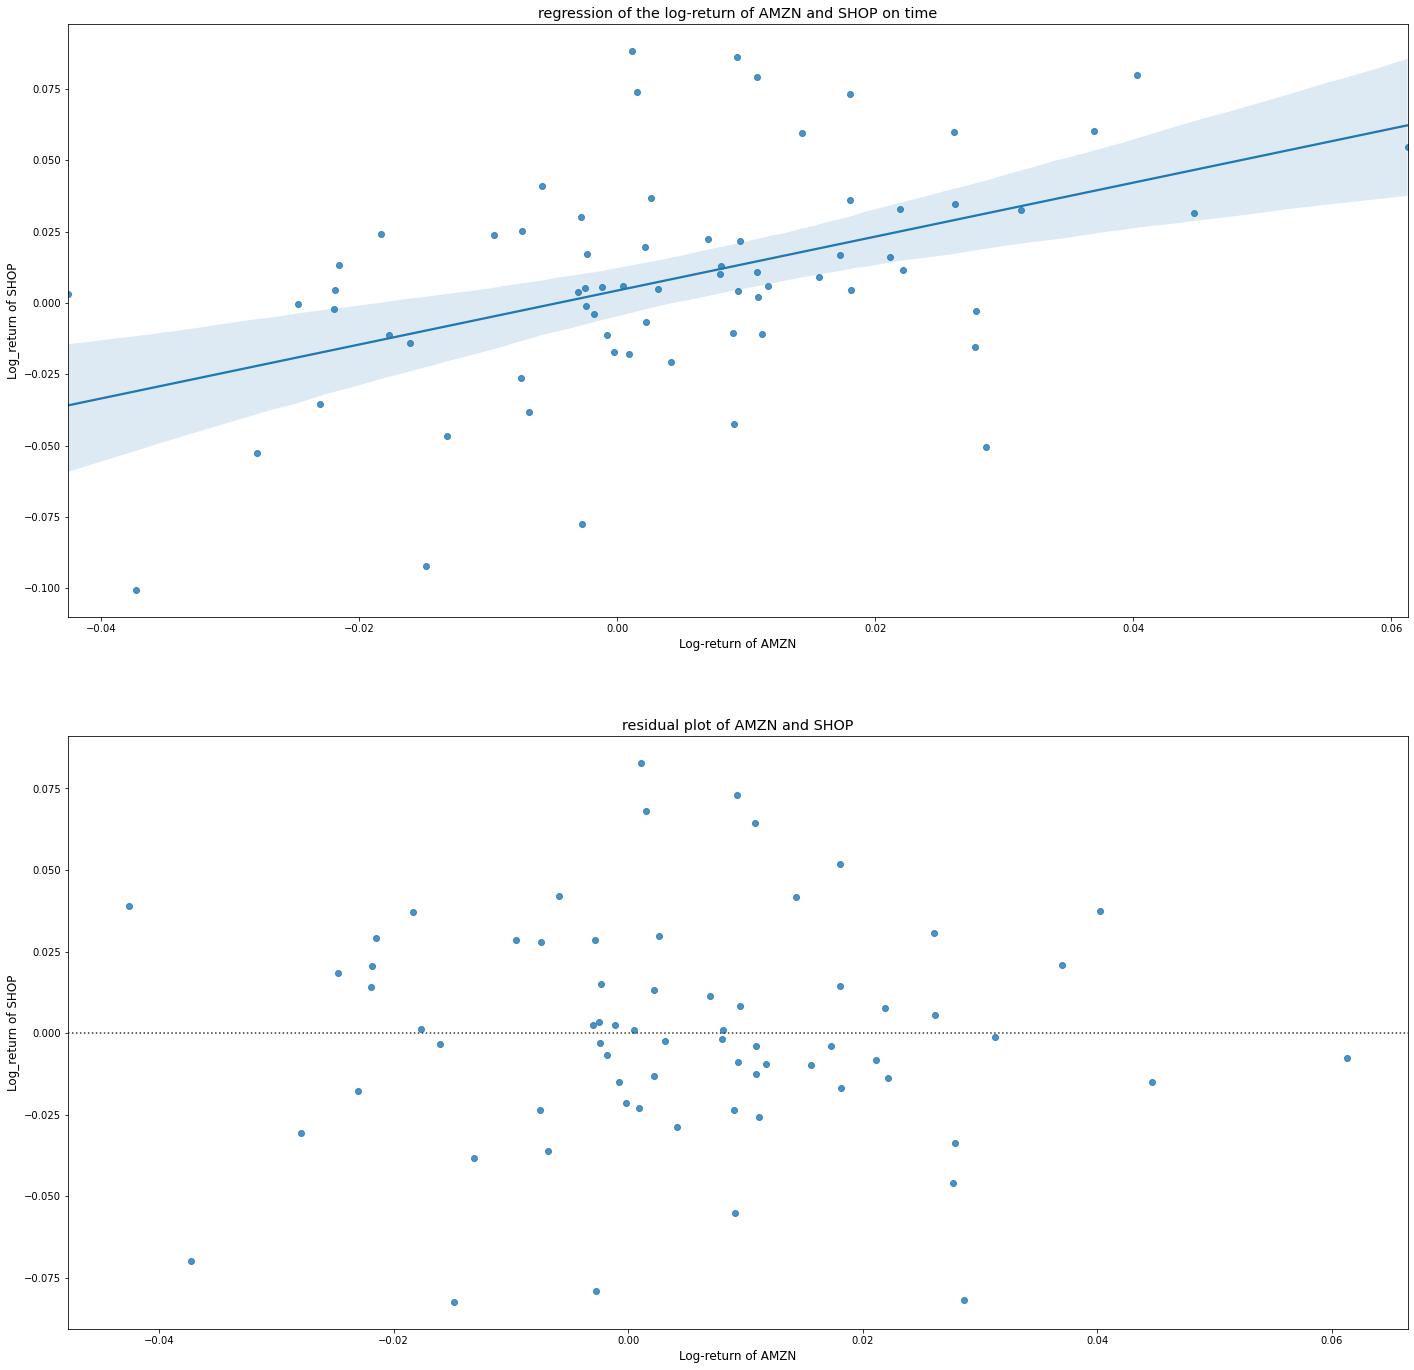

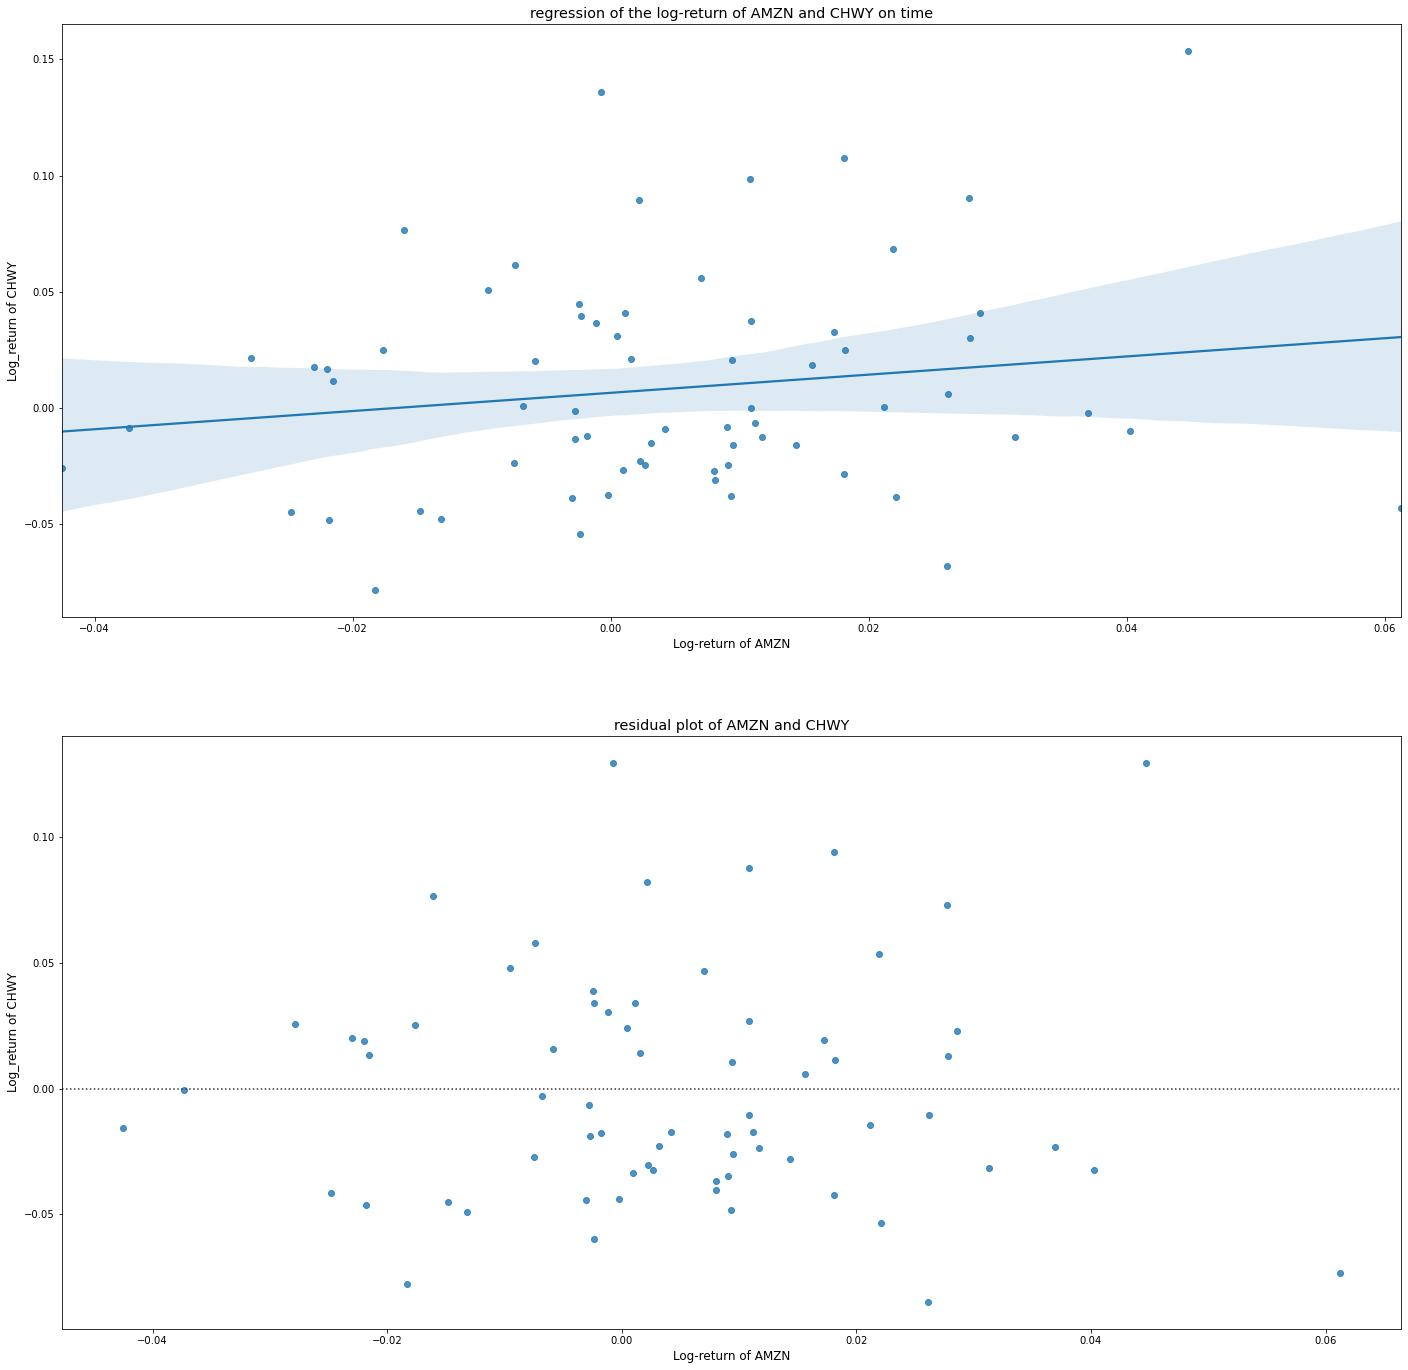

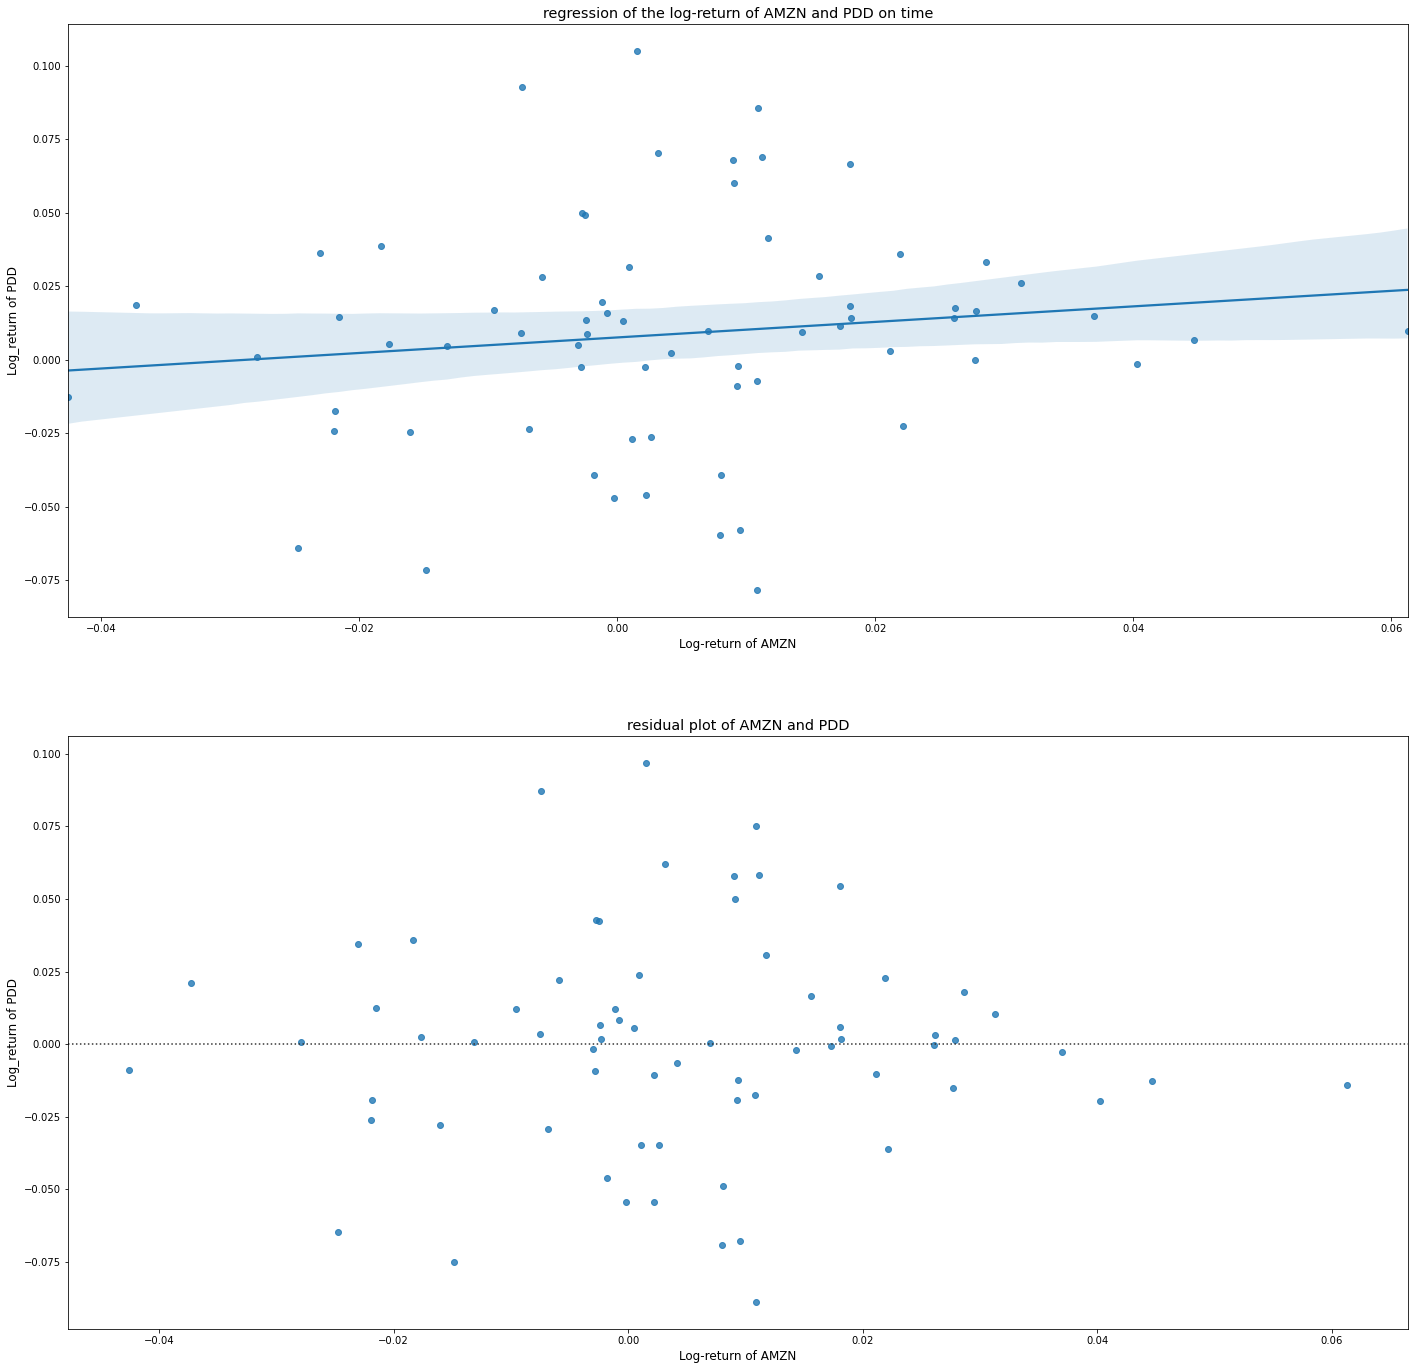

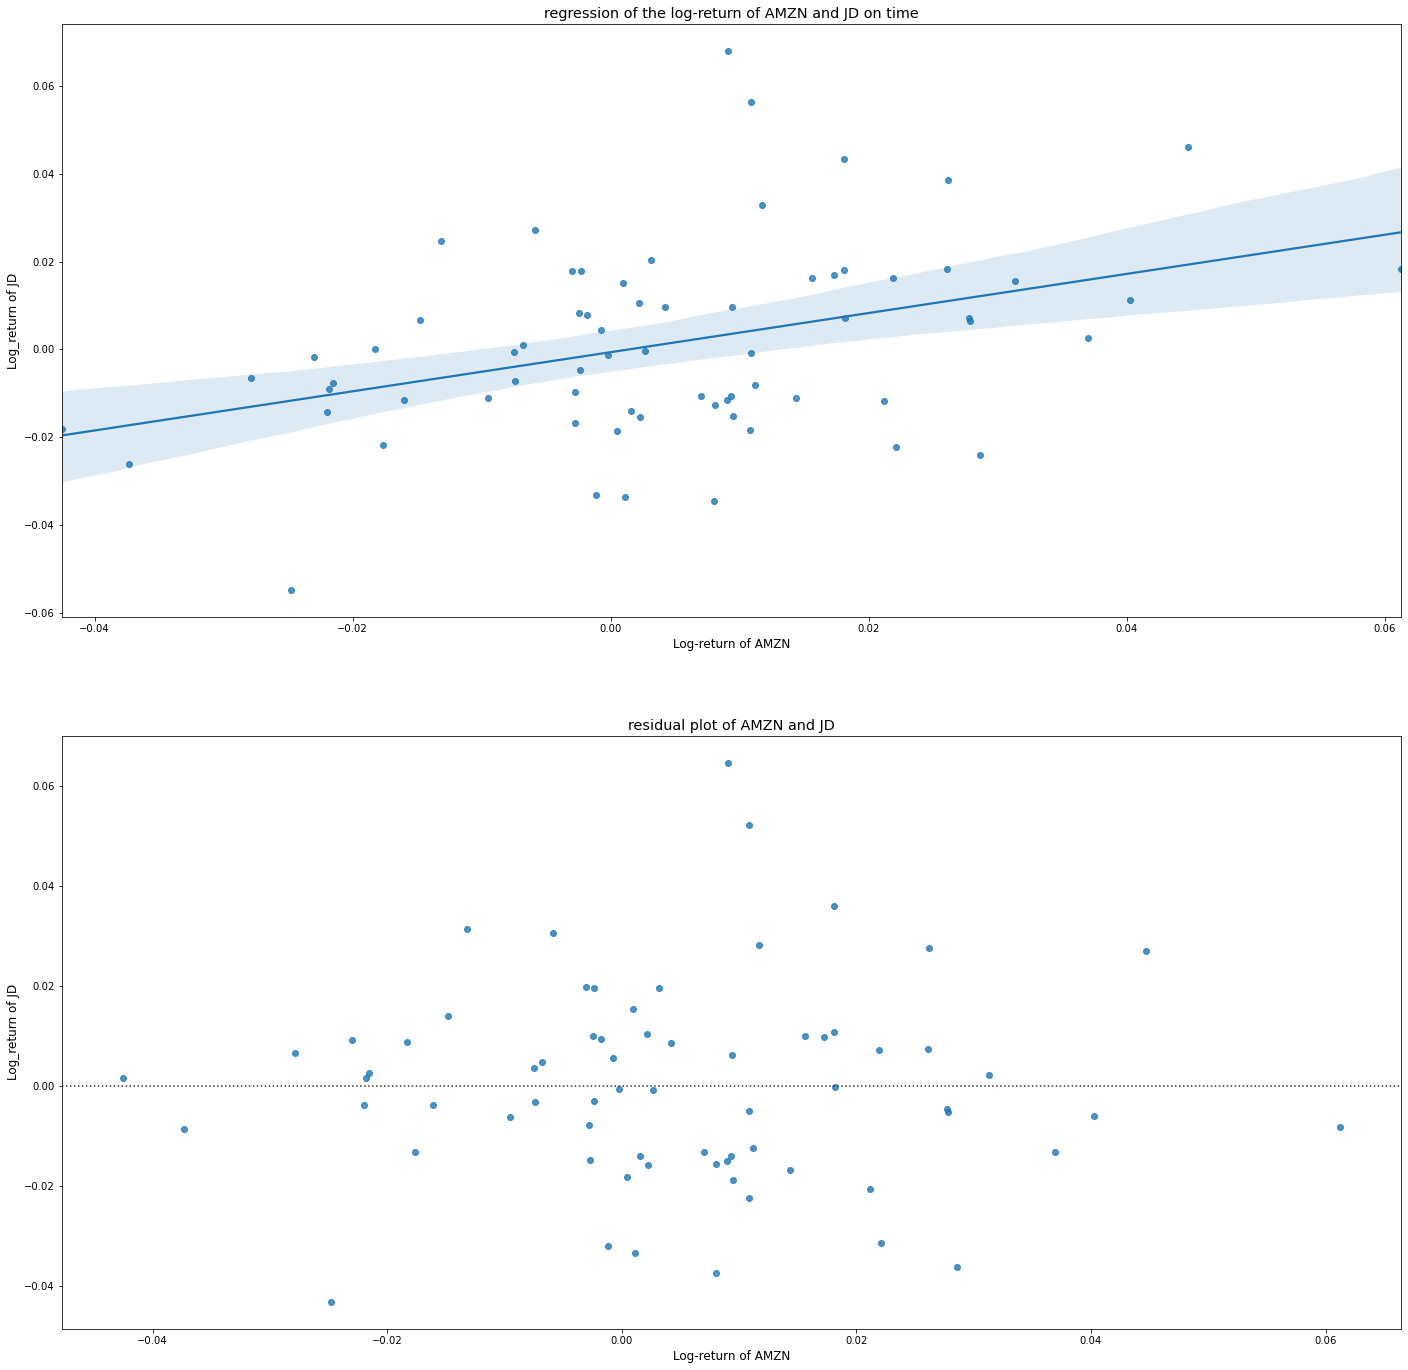

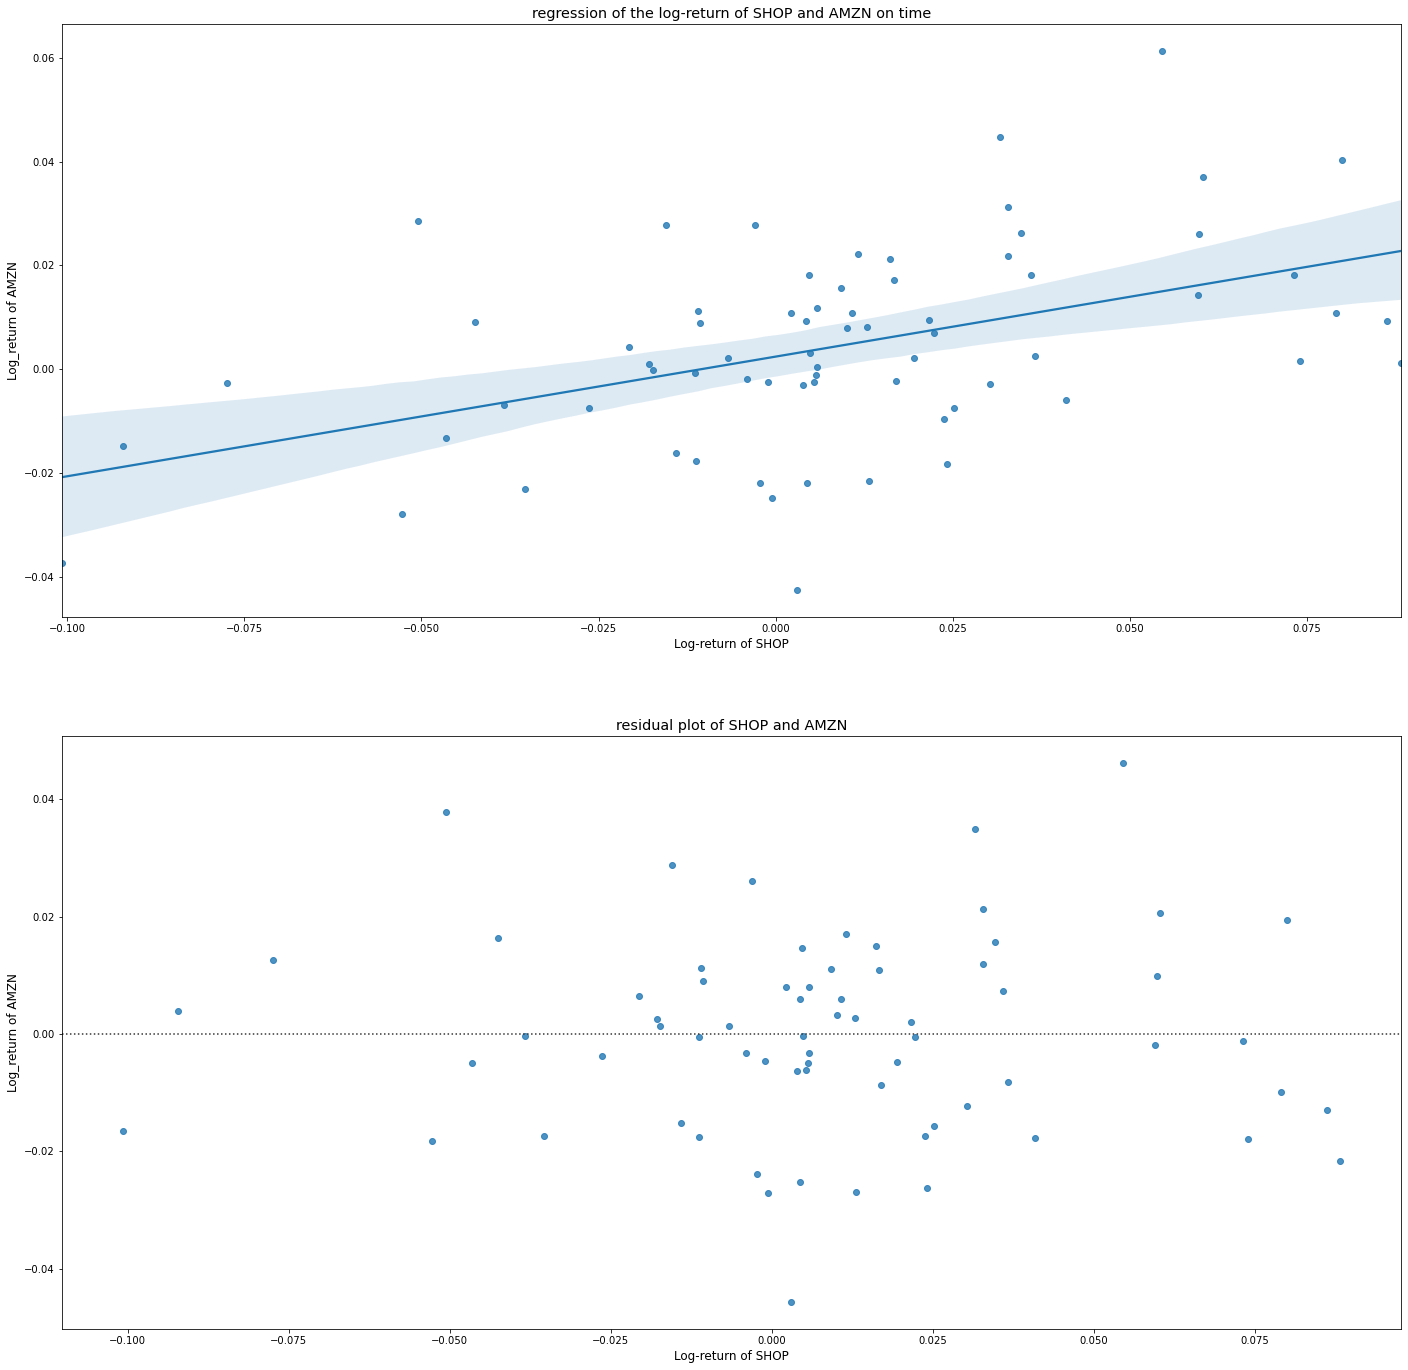

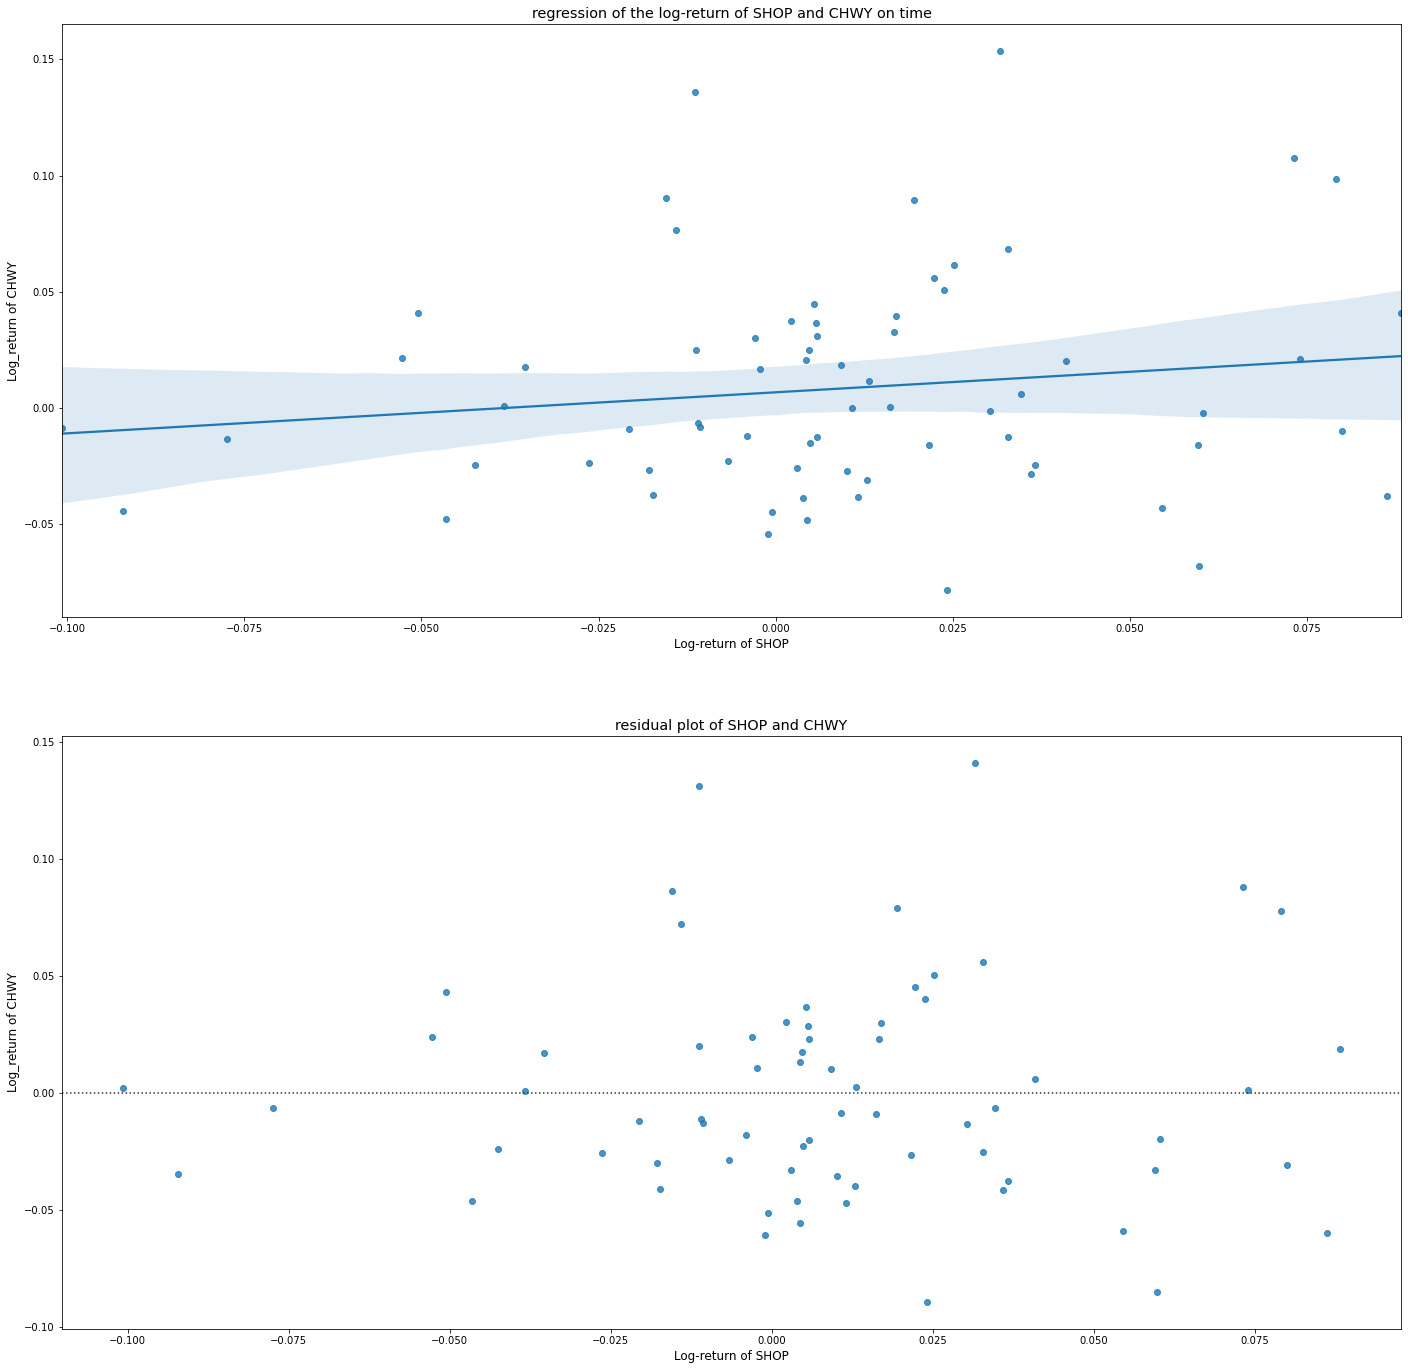

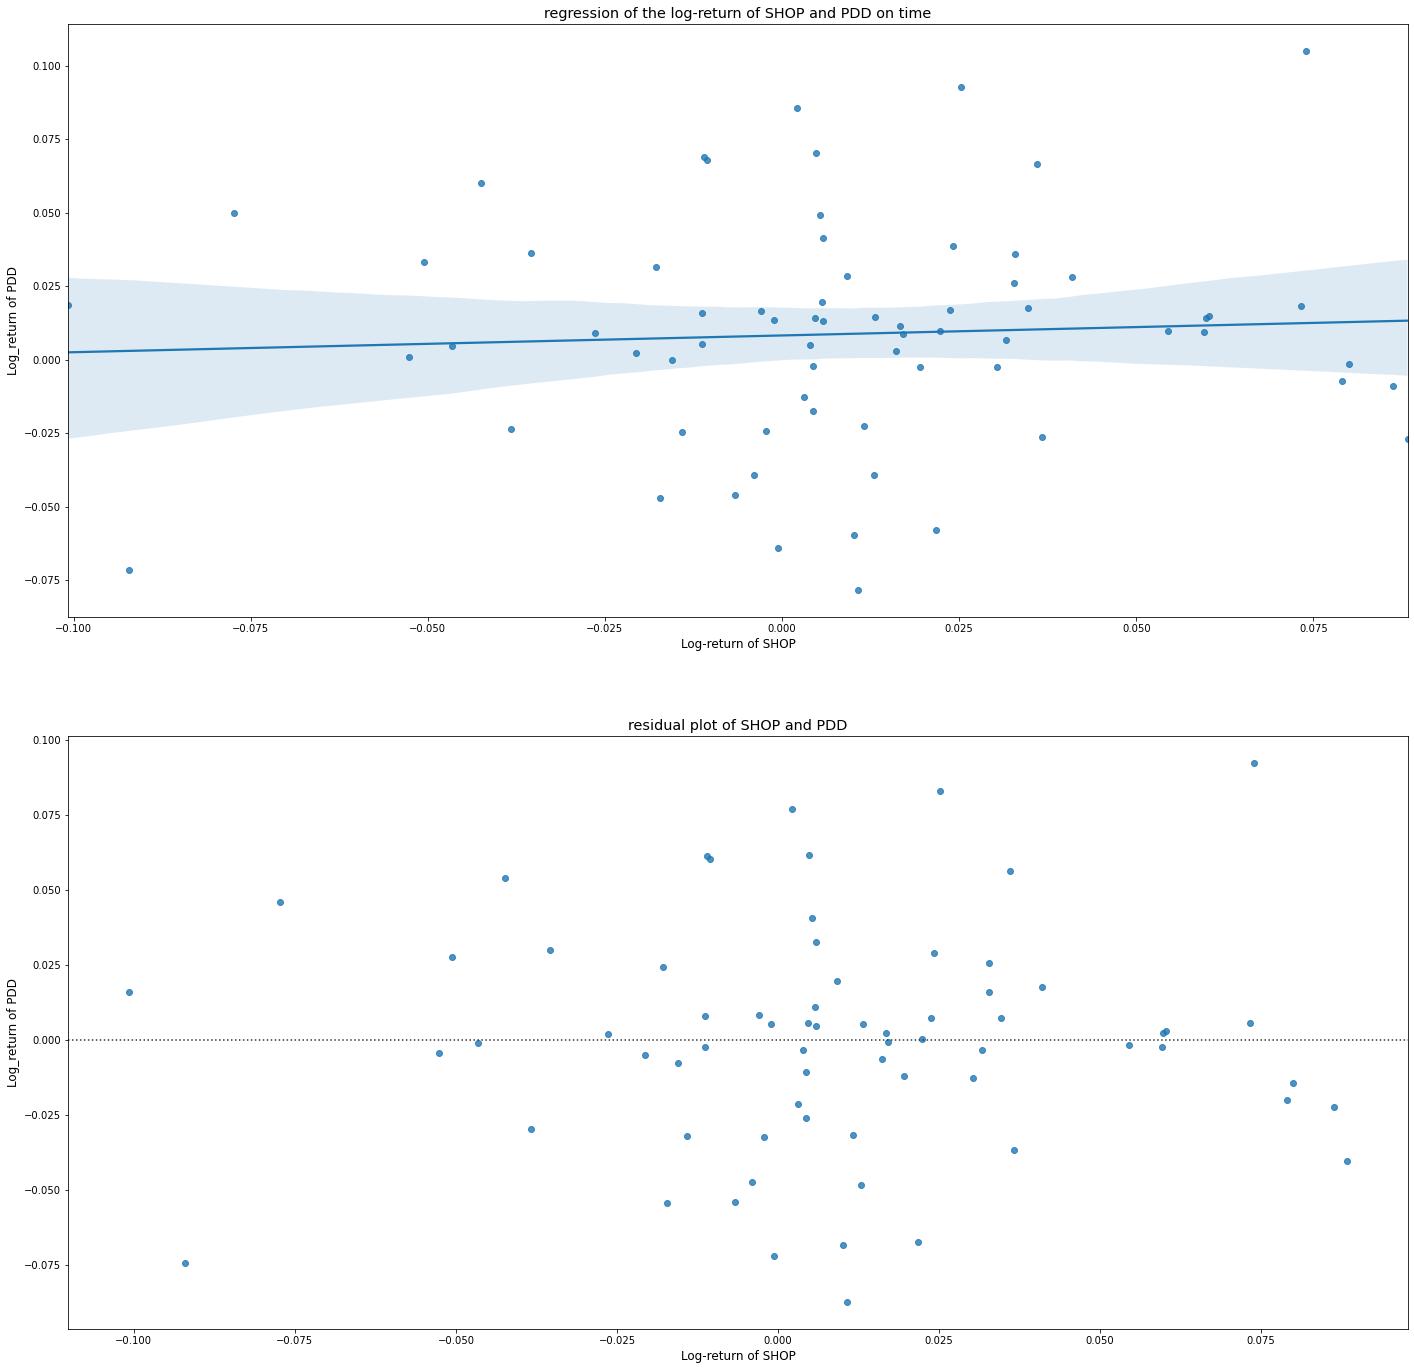

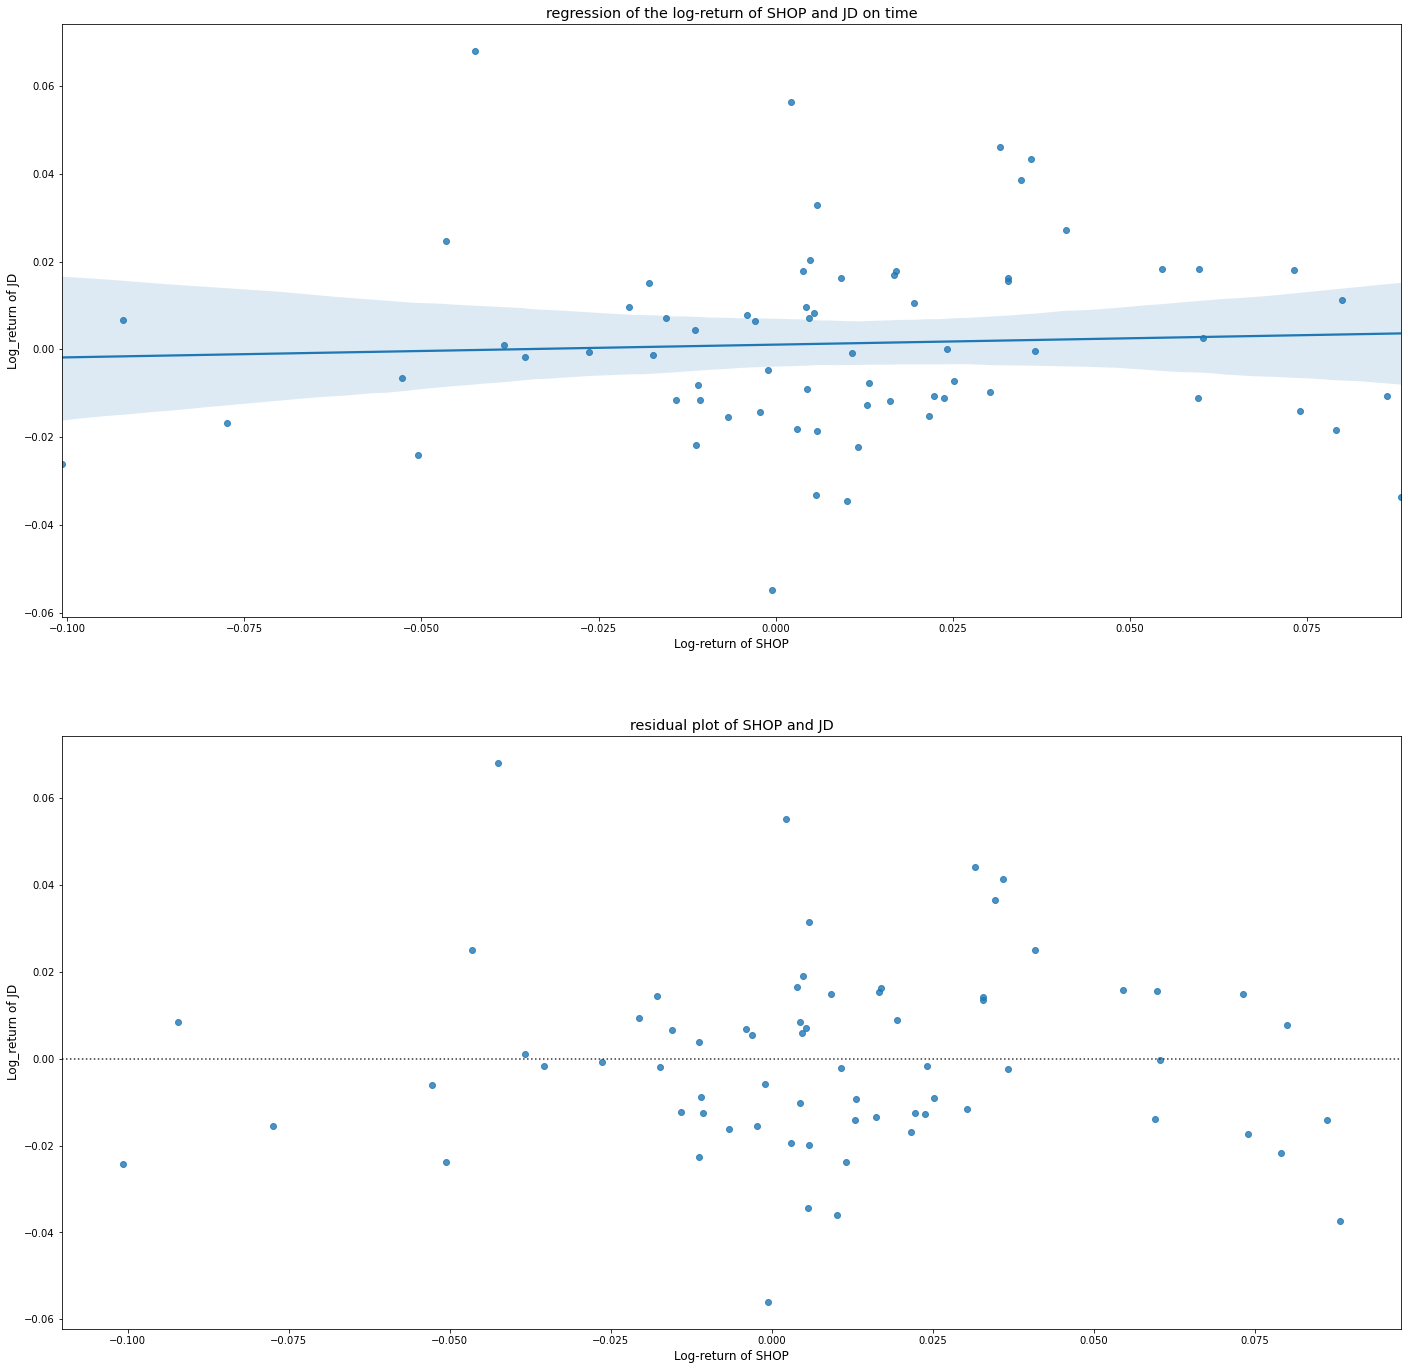

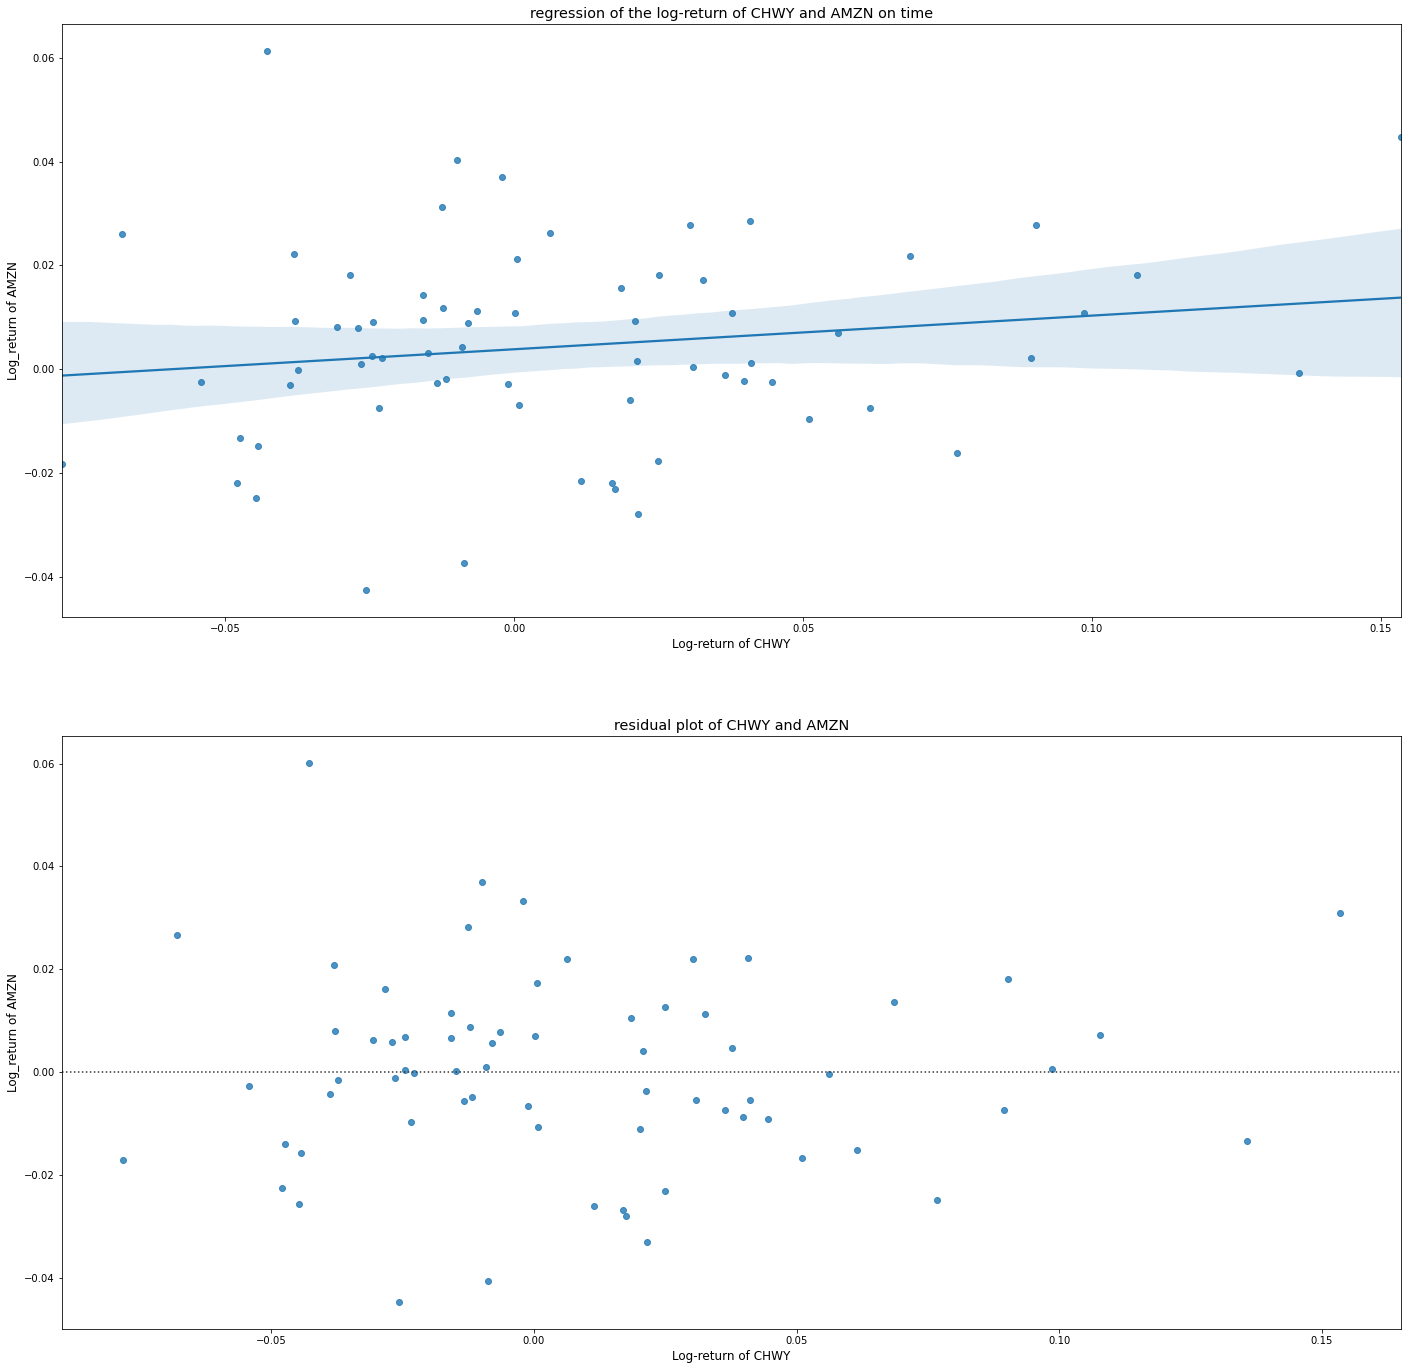

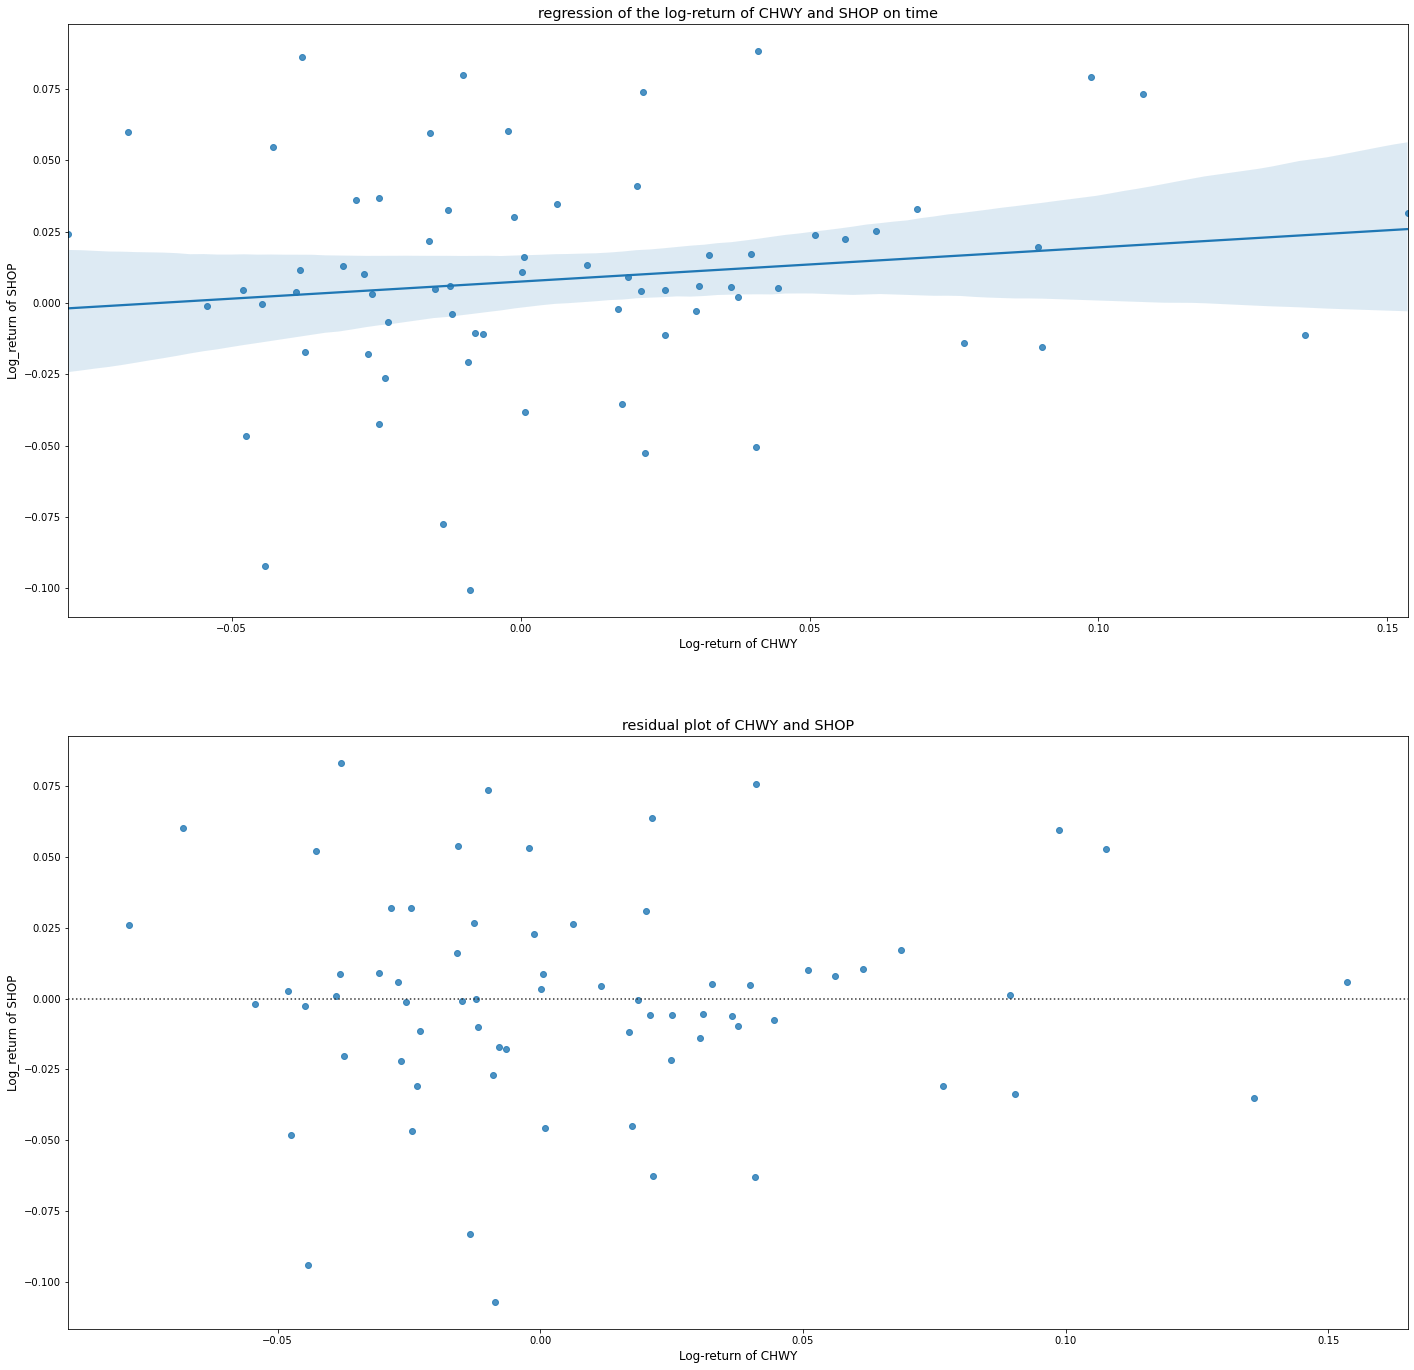

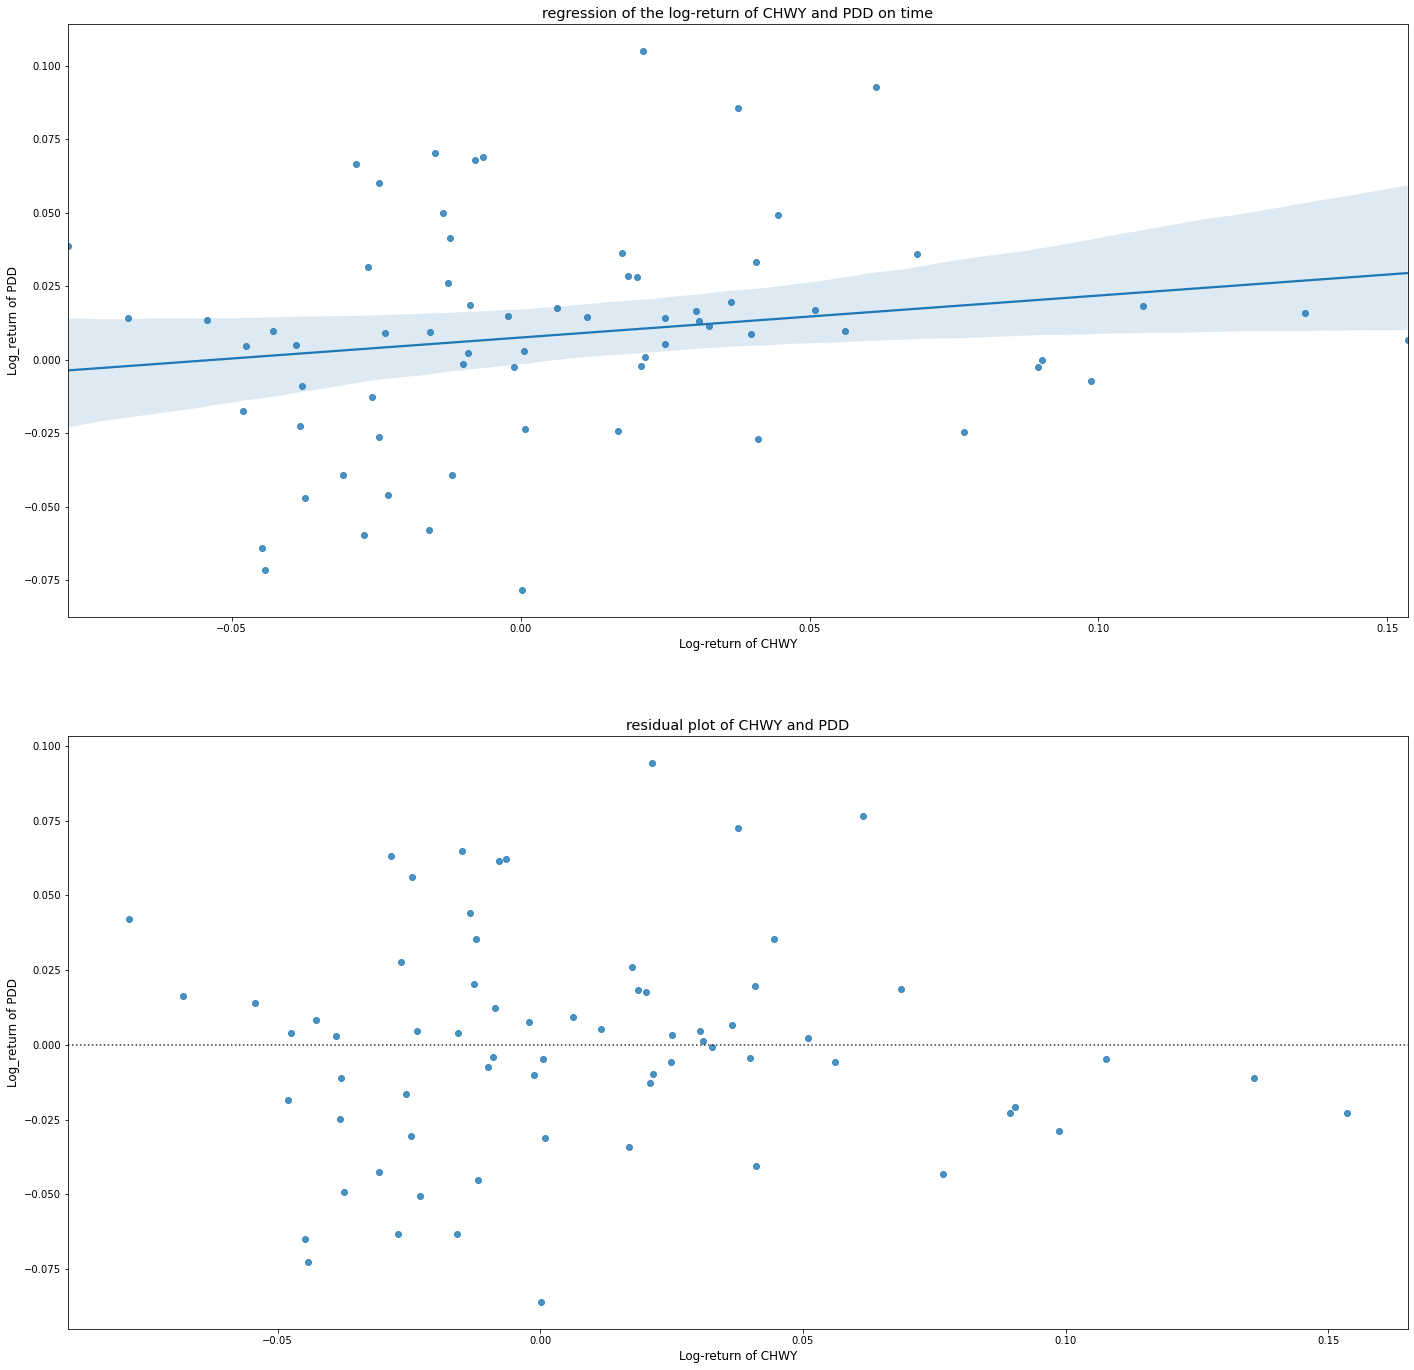

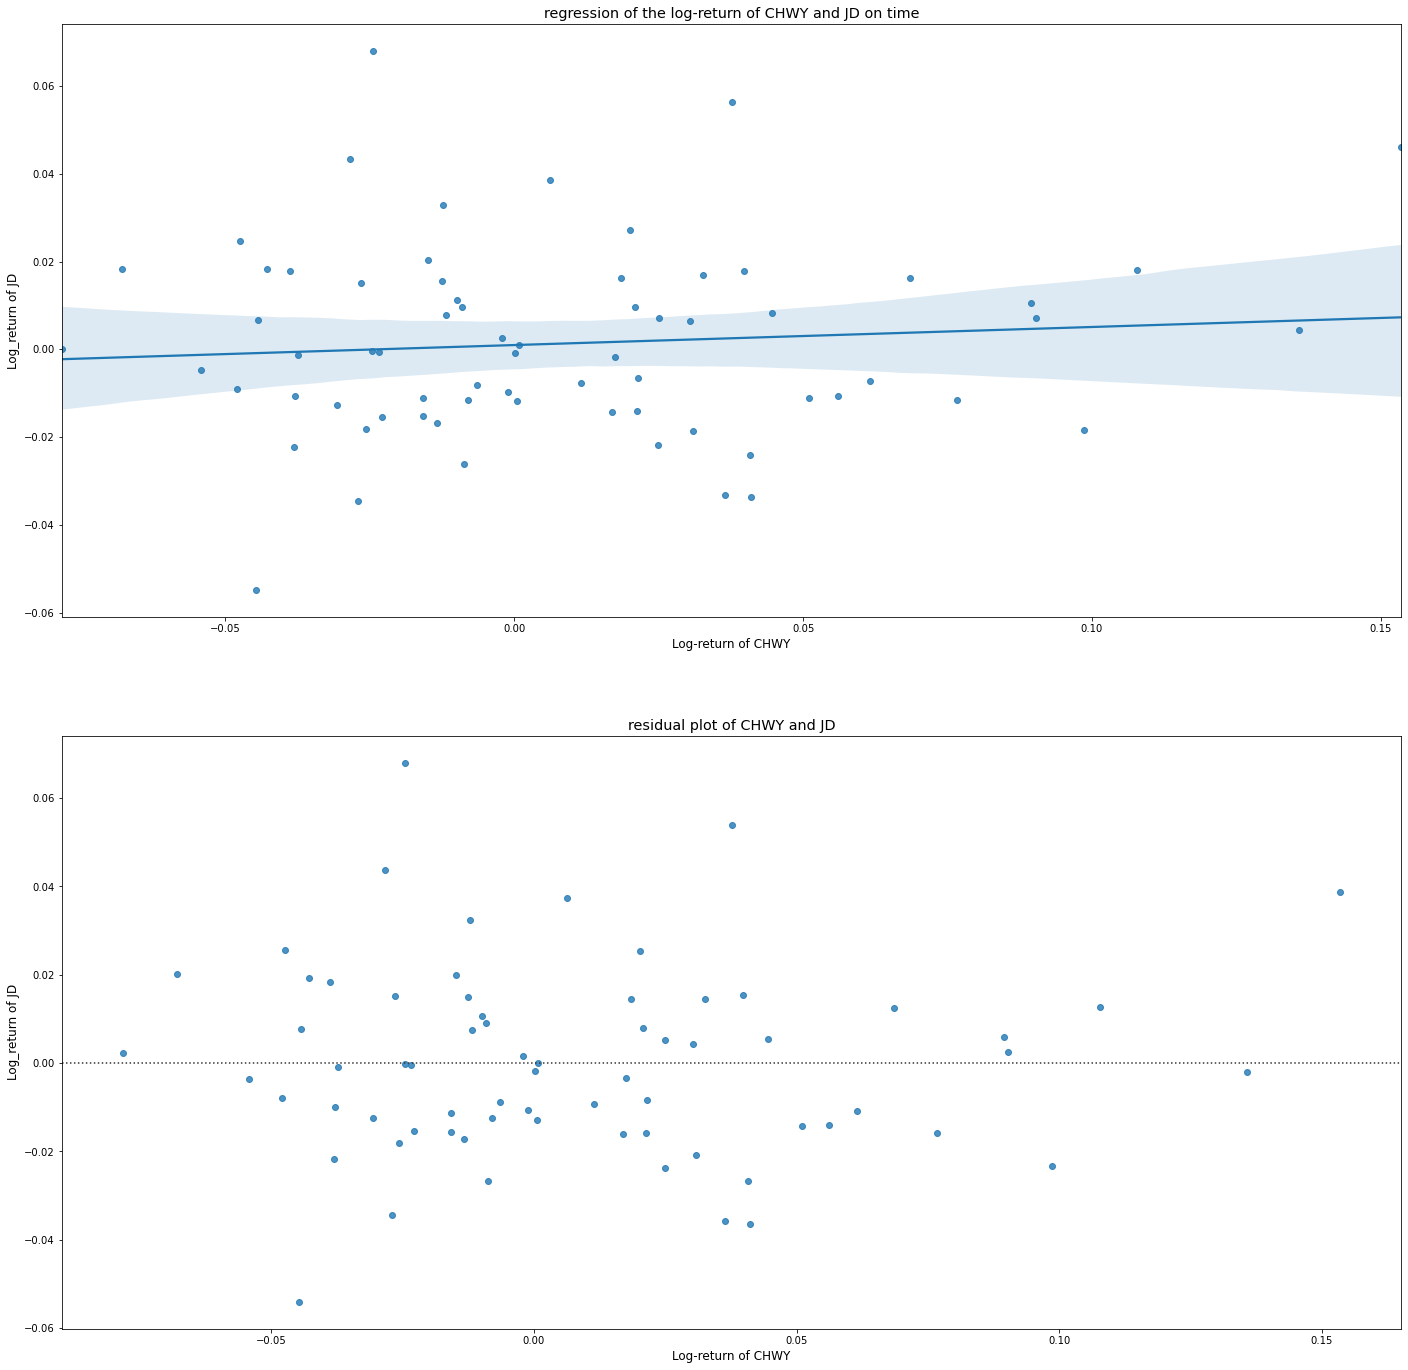

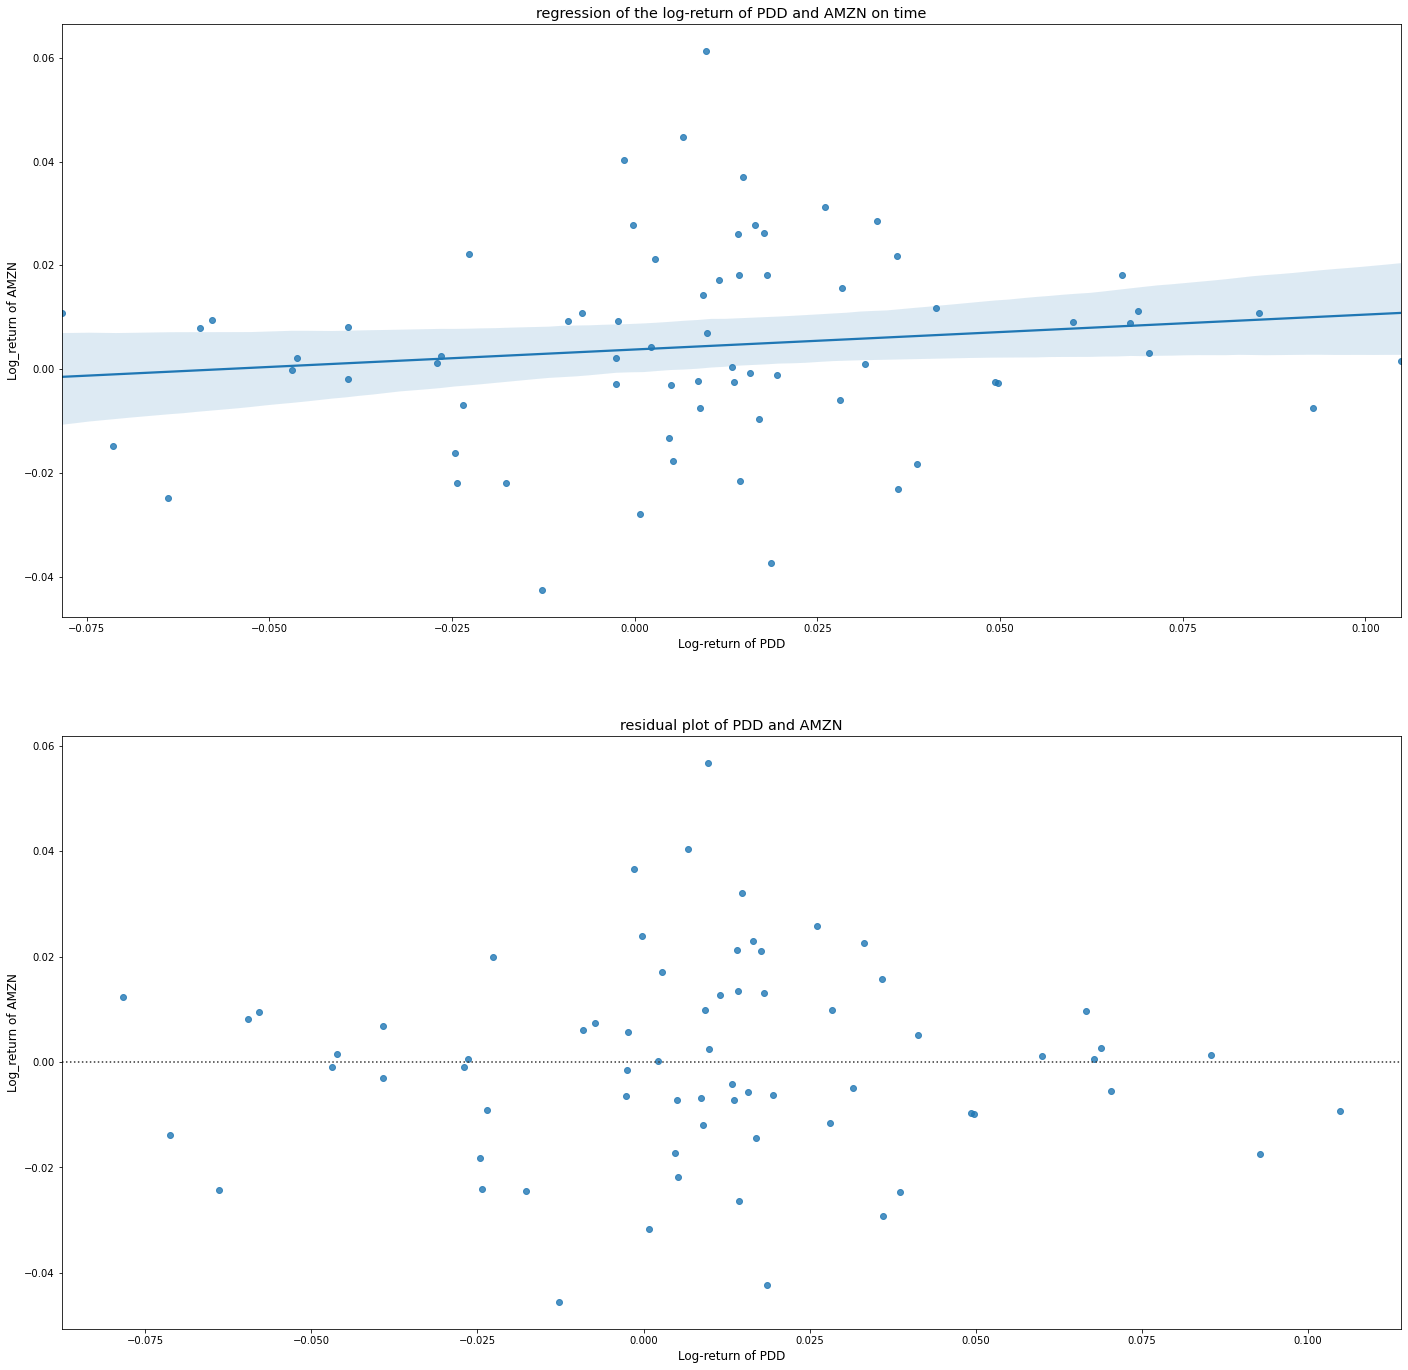

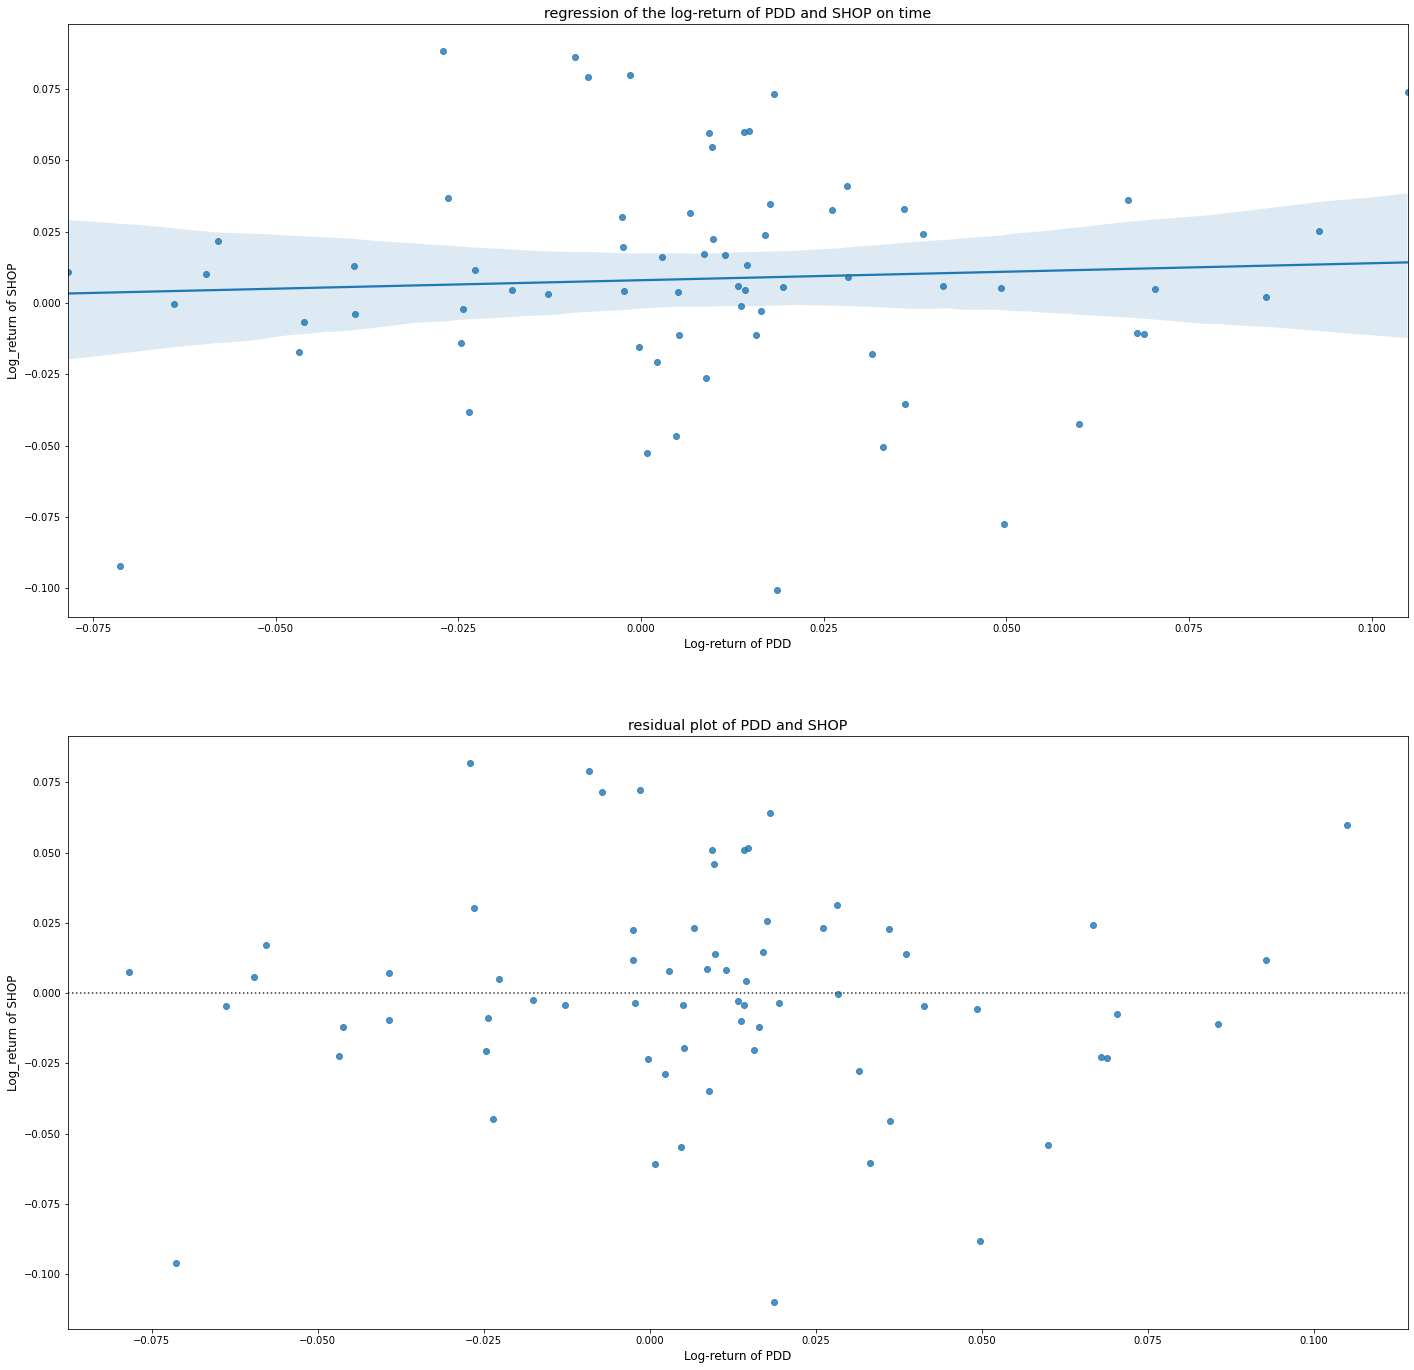

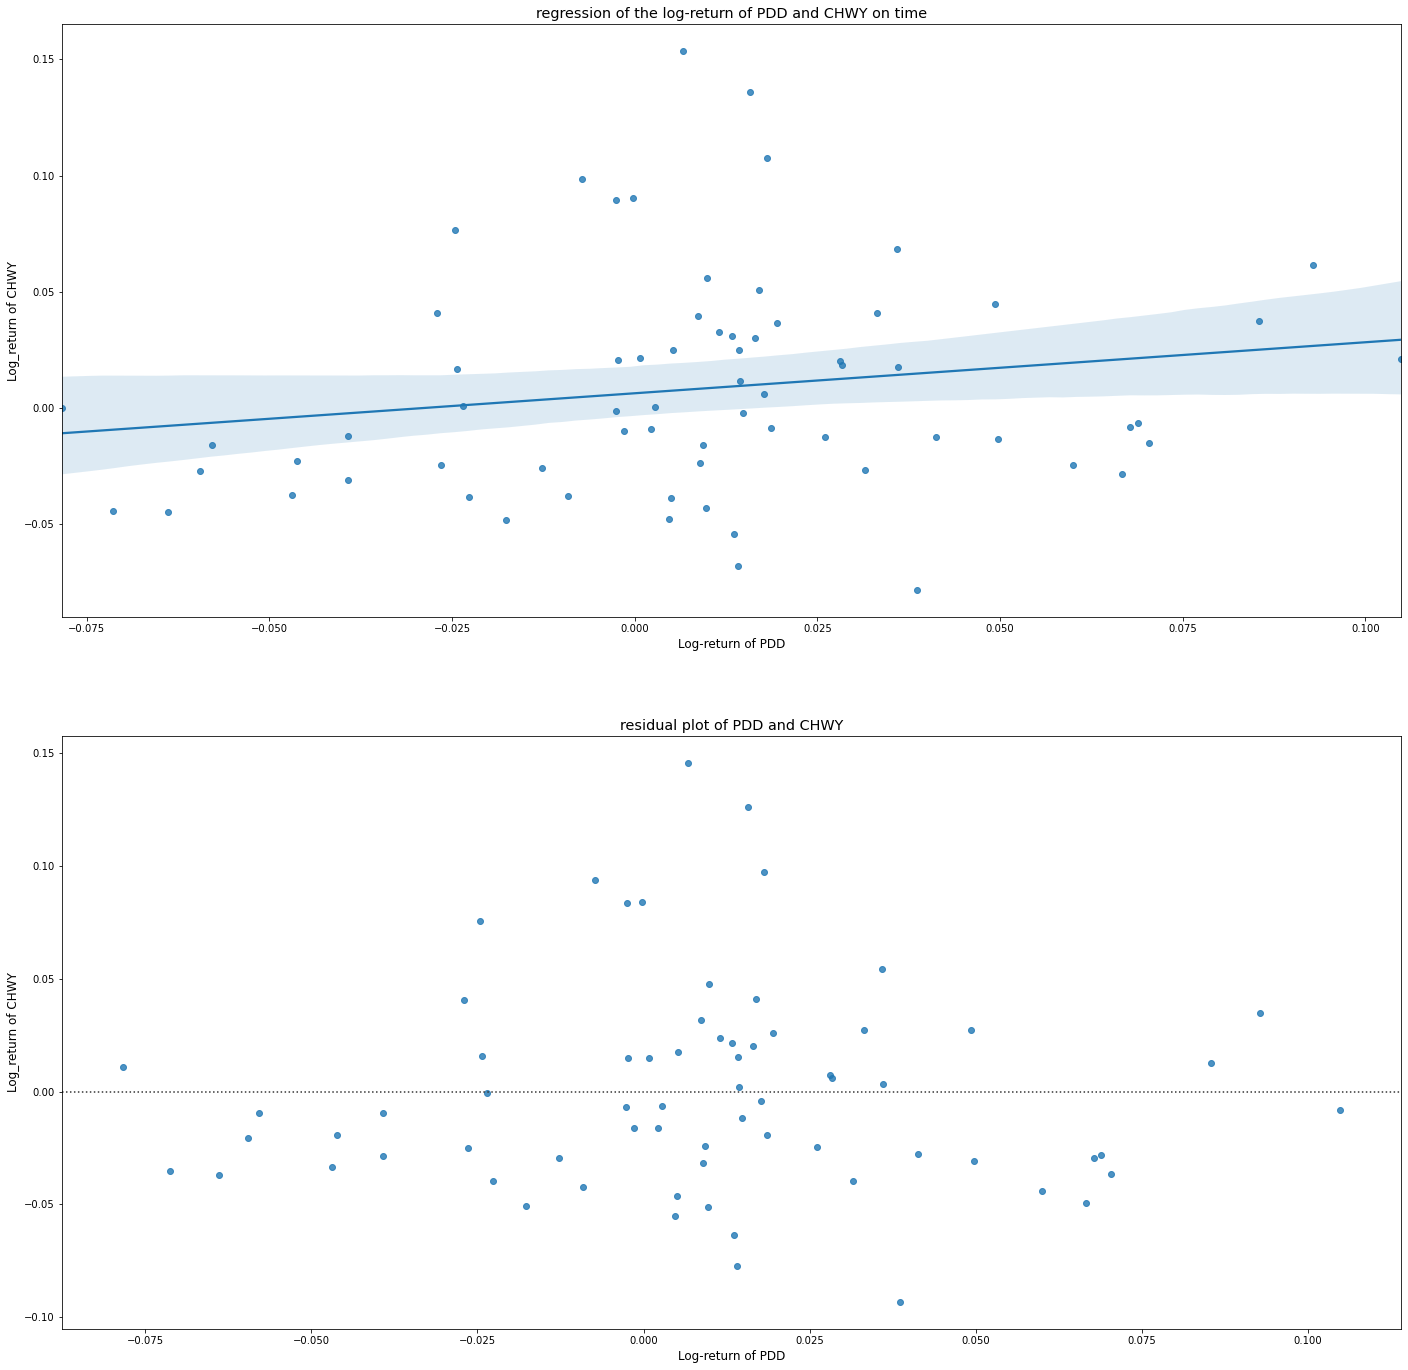

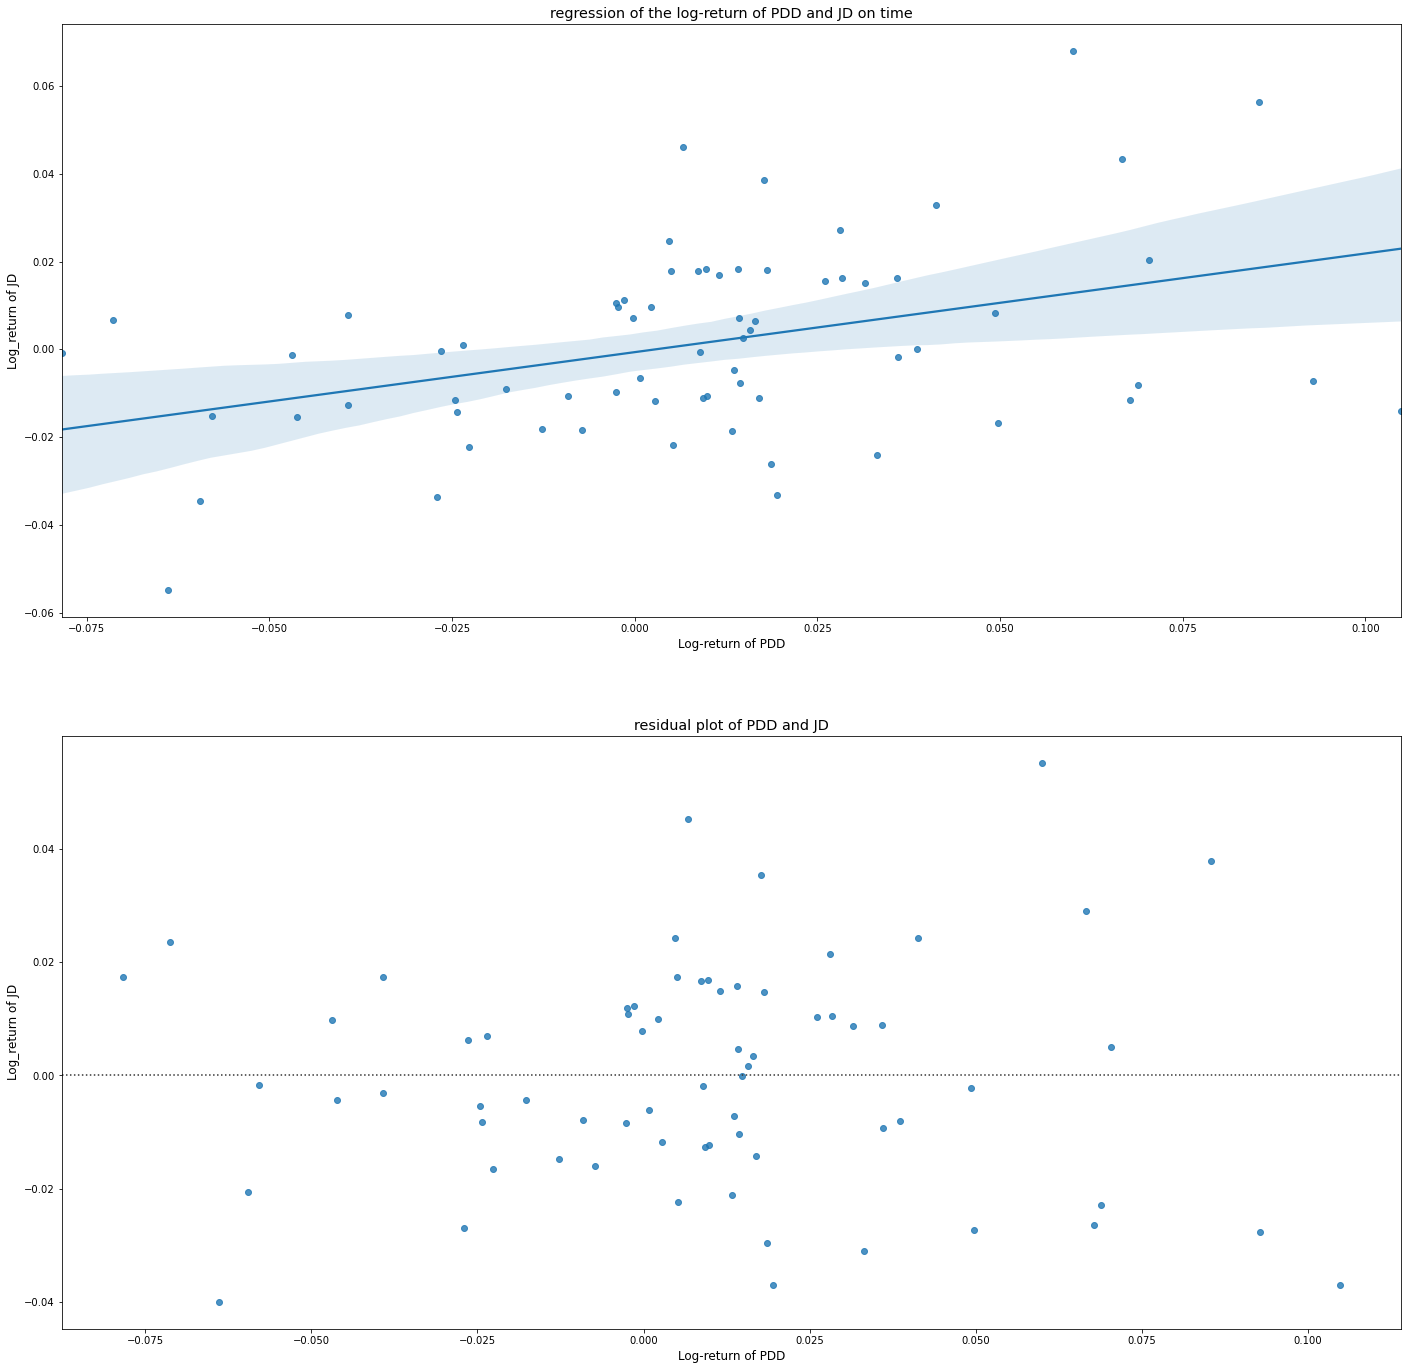

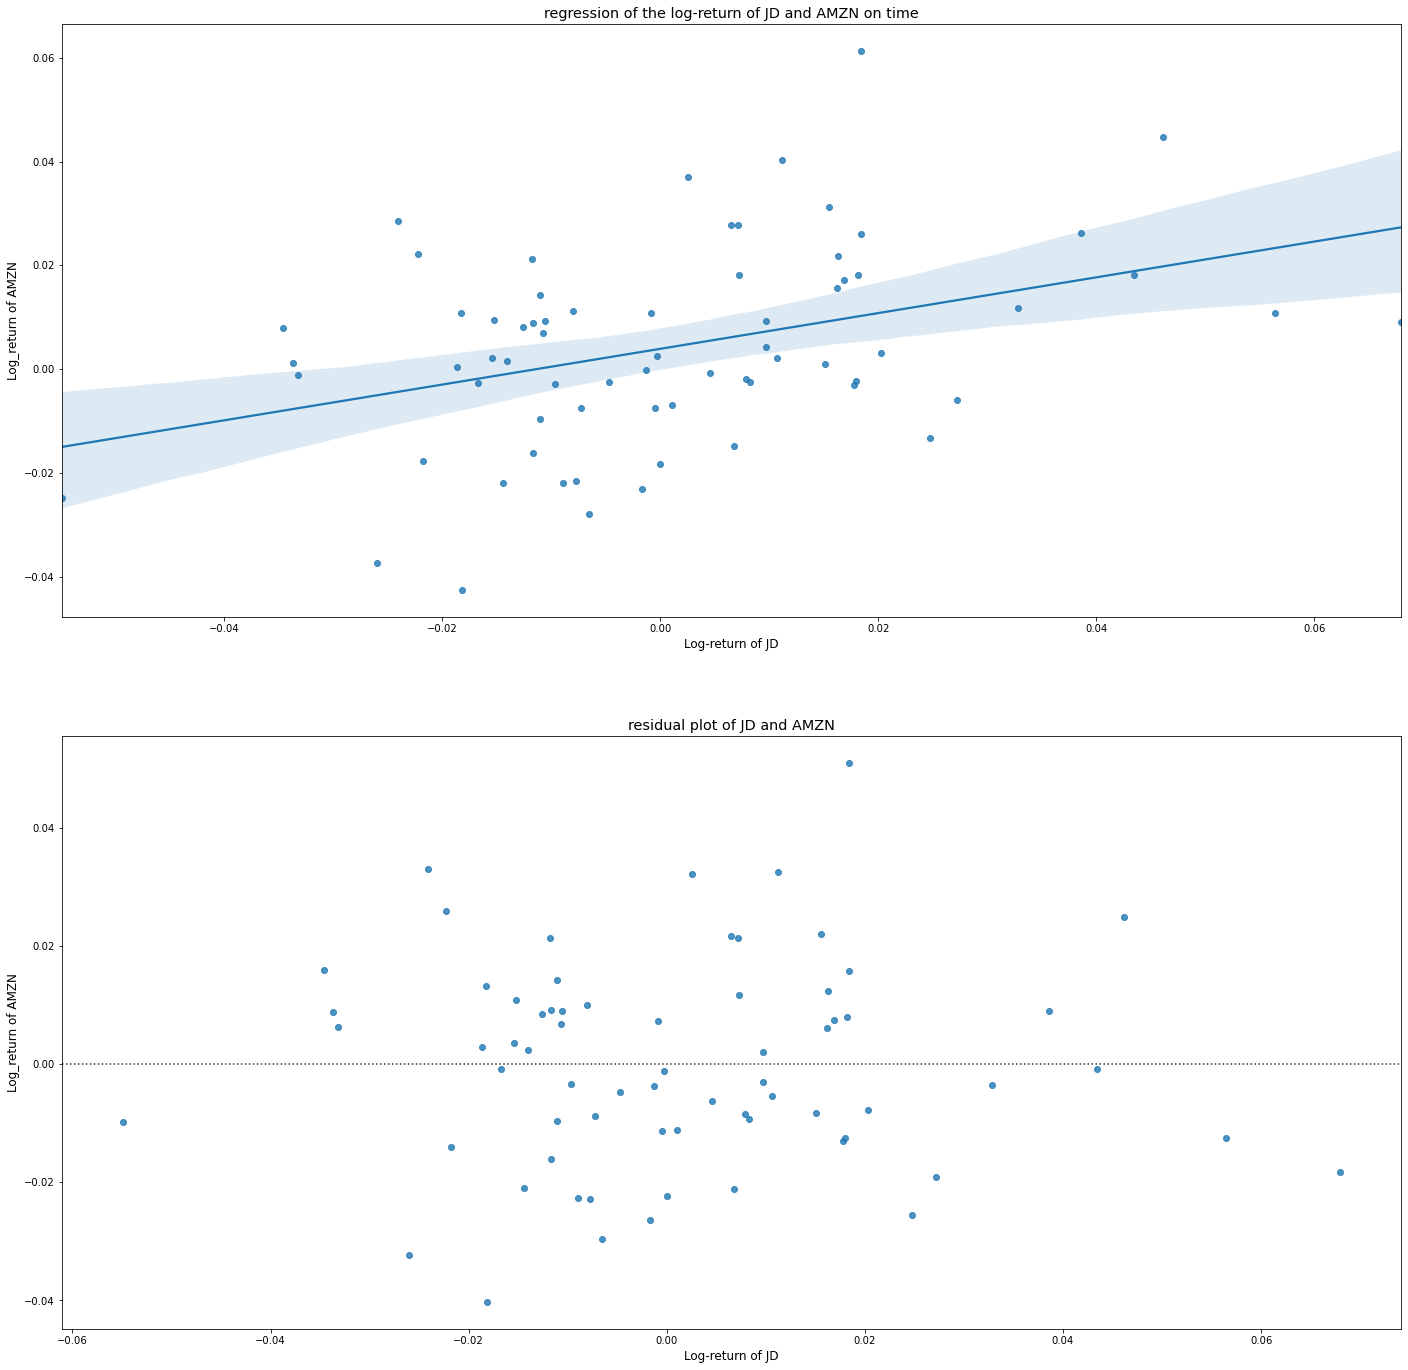

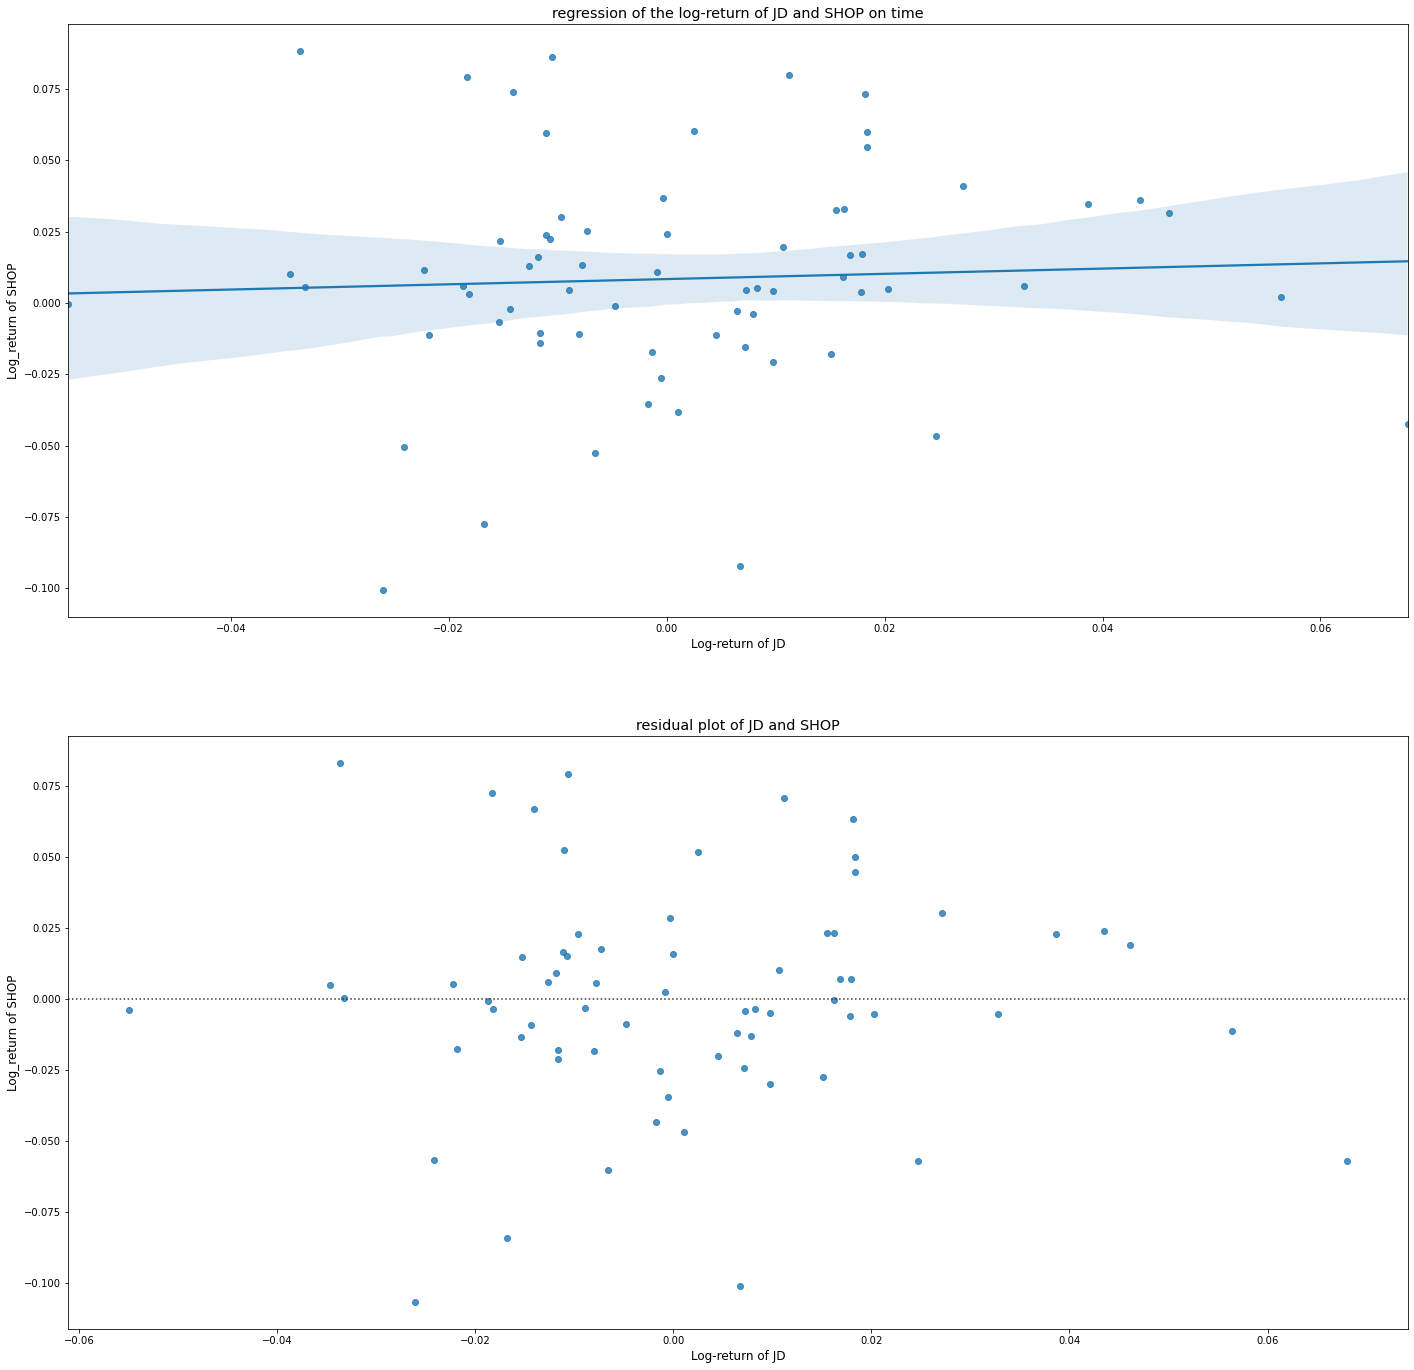

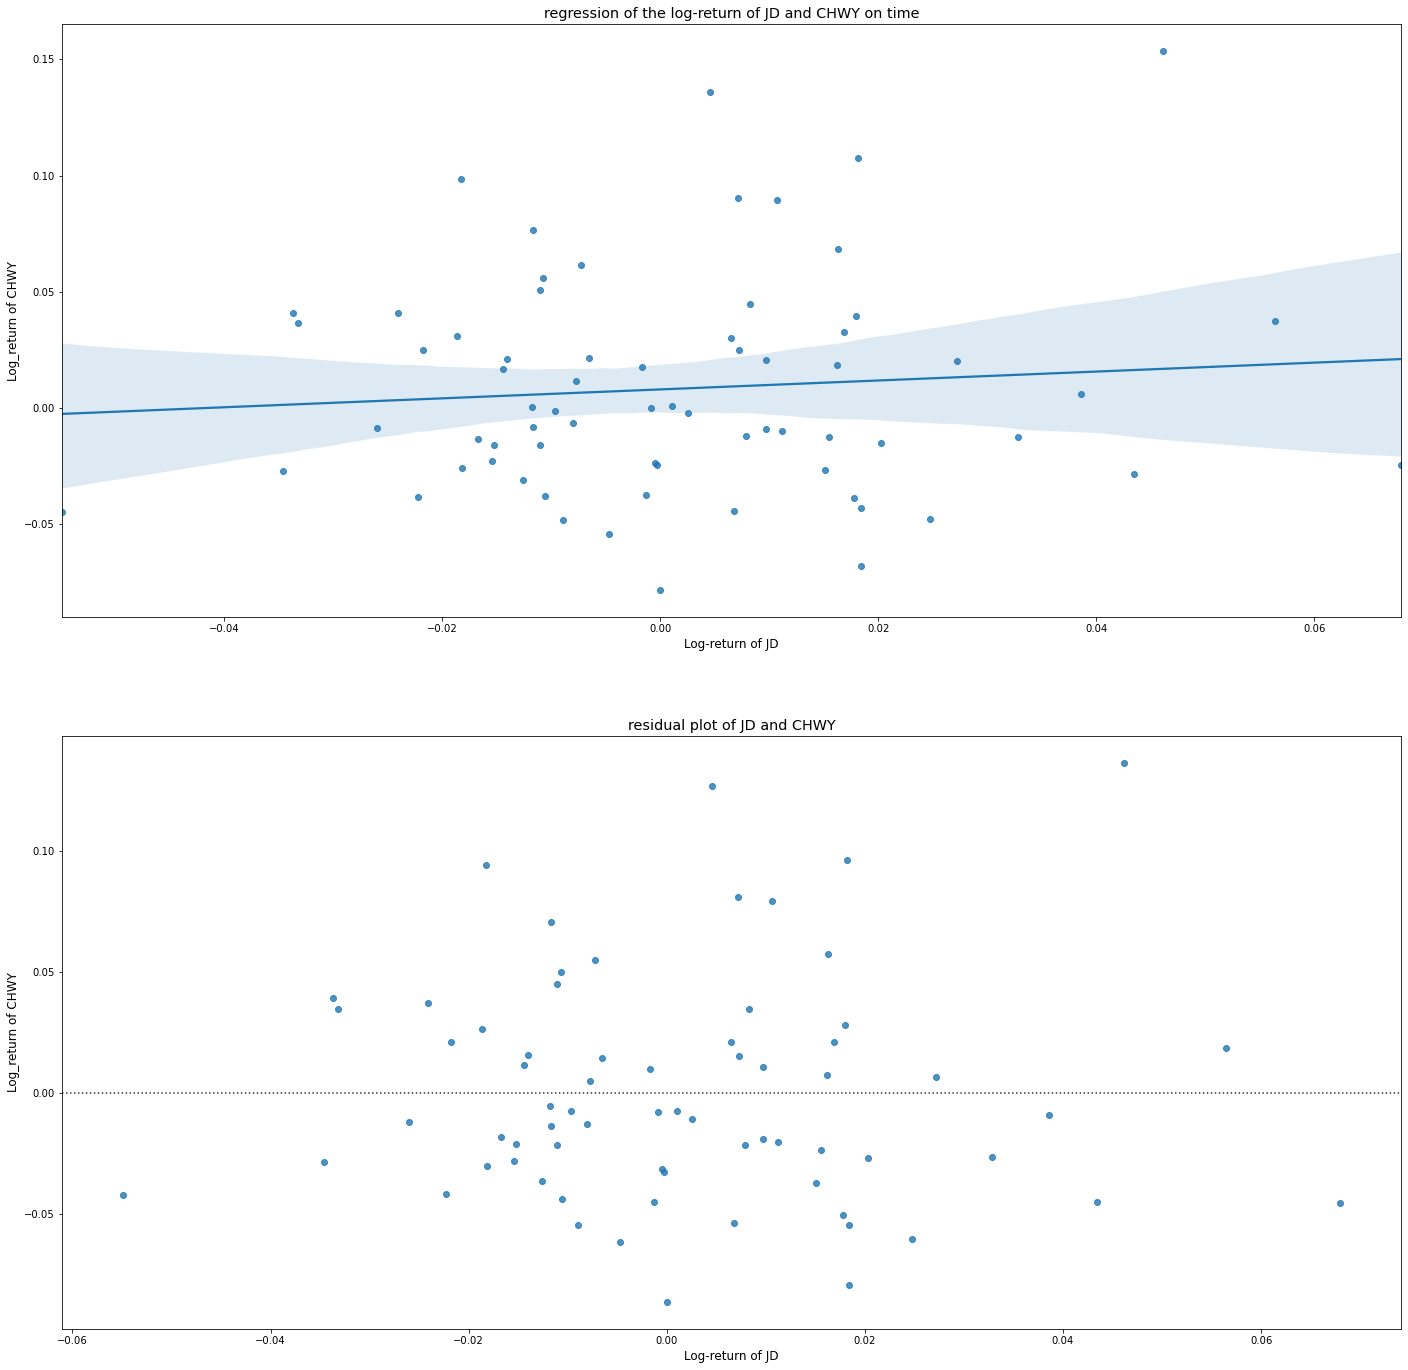

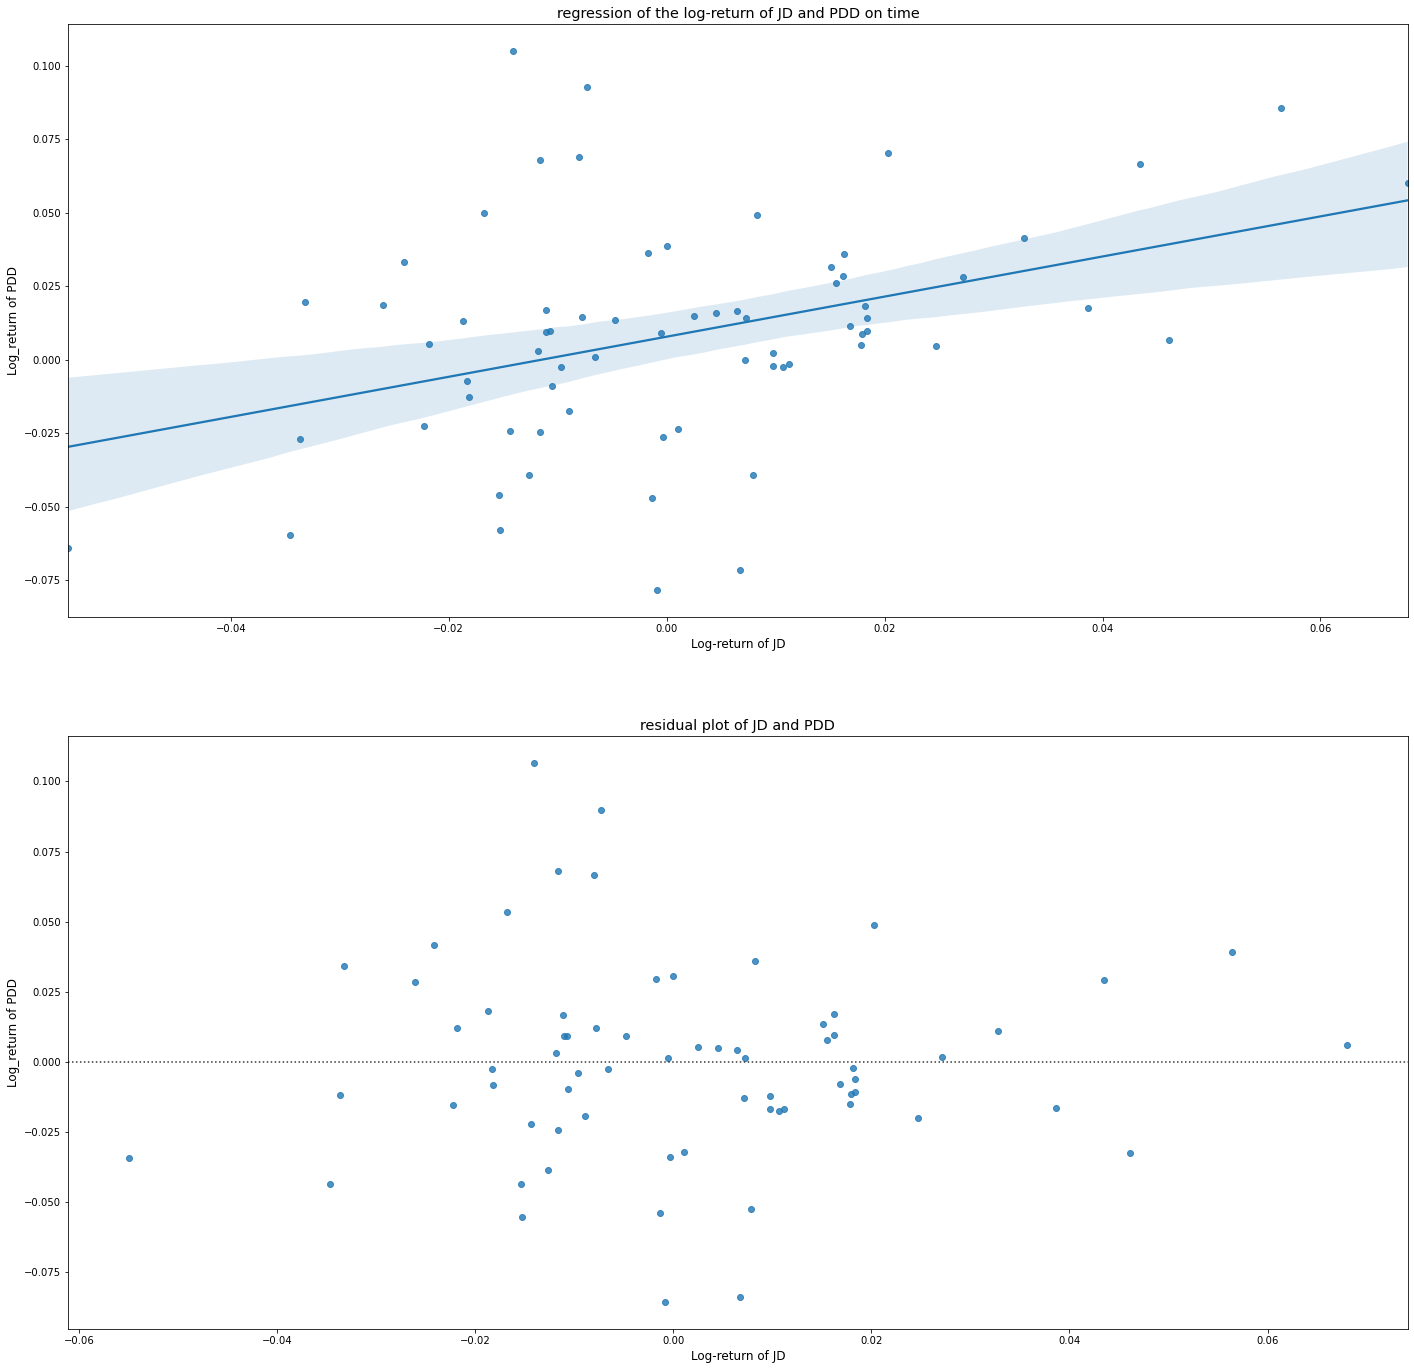

In [20]:
for i in stockname_list:
    for j in stockname_list:
        if i!=j:
            log_return_regression(i,j)